# 03_EDA_ANALISIS_DESCRIPTIVO.ipynb
# Objetivo: análisis descriptivo inicial del dataset ya limpio y transformado

# Importación de librerias y configuración

In [1]:
import os
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Librerías cargadas.")

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("Seaborn versión:", sns.__version__)


Librerías cargadas.
Seaborn versión: 0.13.2


## Configuración global de salidas

## Localización del proyecto y carpeta de salida

In [2]:
# Detectar la raíz real del proyecto (carpeta que contiene "DATA")
PROJECT_ROOT = Path.cwd().resolve()

# Si estás dentro de NOTEBOOKS, sube un nivel
if PROJECT_ROOT.name.lower() == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

# Si aún no ves DATA, sube hasta encontrarla
while not (PROJECT_ROOT / "DATA").exists() and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

# Verificación de seguridad
if not (PROJECT_ROOT / "DATA").exists():
    raise FileNotFoundError("No encuentro la carpeta 'DATA'. Abre el notebook dentro del proyecto.")

# Directorios de salida
OUT_DIR = PROJECT_ROOT / "DATA" / "DATA_OUTPUT" / "EDA"
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Raíz del proyecto:", PROJECT_ROOT)
print("Carpeta de salidas (OUT_DIR):", OUT_DIR)


Raíz del proyecto: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics
Carpeta de salidas (OUT_DIR): C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA


## Cargo dataset limpio y transformado

In [3]:
FNAME = "dataset_limpio_y_transformado.csv"
ruta_dataset = PROJECT_ROOT / "DATA" / "DATA_OUTPUT" / FNAME

# Comprobación y carga segura
if not ruta_dataset.exists():
    # Búsqueda recursiva en caso de estar en otra subcarpeta
    hits = list(PROJECT_ROOT.rglob(FNAME))
    if hits:
        ruta_dataset = hits[0]

if not ruta_dataset.exists():
    raise FileNotFoundError(
        f"No encuentro el archivo {FNAME}. Vuelve a exportarlo a DATA/DATA_OUTPUT/ o revisa su nombre.\n"
        f"Probé en: {ruta_dataset.parent}"
    )

print("Usando archivo:", ruta_dataset)
df = pd.read_csv(ruta_dataset, encoding="utf-8")
print("✓ Dataset cargado correctamente.")
print("Filas:", df.shape[0], " | Columnas:", df.shape[1])
df.head()


Usando archivo: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\dataset_limpio_y_transformado.csv
✓ Dataset cargado correctamente.
Filas: 39906  | Columnas: 34


,transaction_id,customer_id,name,email,phone_clean,dominio,risk_score,risk_level,created_at,customer_days_active,transaction_date,transaction_hour,hour,year,month,day,weekday,month_year,region_normalized,country_normalized,is_international,amount,currency,merchant,merchant_category,entry_mode,transaction_result,arn,card_type,card_bin6,card_last4,card_masked,card_expiry,is_fraud
0,022747b2-1620f494,bf7ebaf36760,David Davis,butlervicki+1855@yahoo.com,4483070721,yahoo.com,0.46,Medio,2025-11-30,328,2025-01-06,19:06:08,0,2025,11,30,Sunday,2025-11,Idaho,Vanuatu,1,115.95,EUR,Brown-Gilbert,restaurant,wallet,approved,37a7048c3a5045f9b8baf73c,MASTERCARD,423952,"6,802.00",XXXX-XXXX-XXXX-6802,03/24,0.00
1,46db399b-245984a0,3447adff8b2d,Chris Garcia,gutierrezalexander+2117@hotmail.com,6361970252,hotmail.com,0.35,Medio,2025-04-24,106,2025-08-08,17:59:21,0,2025,4,24,Thursday,2025-04,Haiti,Swaziland,1,139.10,EUR,Maldonado-Beck,electronics,chip,approved,b0a54d13ca094472aa652ae7,VISA,469023,"9,432.00",XXXX-XXXX-XXXX-9432,02/29,0.00
2,8f70d5c5-2f904c1c,feab2ab972ff,Megan Ortiz,grocha+9203@hotmail.com,679033658,hotmail.com,0.96,Alto,2025-11-13,324,2024-12-24,04:12:33,0,2025,11,13,Thursday,2025-11,Chile,French Southern Territories,1,354.94,EUR,Skinner-Kirby,grocery,wallet,approved,f1498055674142eeaf7456fb,VISA,466645,"3,897.00",XXXX-XXXX-XXXX-3897,01/25,0.00
3,f5a1dfad-a074d8e5,6715f0073d4f,Richard Smith,ekrueger+4283@gmail.com,283539461021,gmail.com,0.23,Bajo,2024-11-27,212,2025-06-27,00:10:54,0,2024,11,27,Wednesday,2024-11,Mississippi,Togo,1,130.16,EUR,Chavez LLC,travel,wallet,declined,aa29b6006b7147a7b64a6600,MASTERCARD,493167,"7,124.00",XXXX-XXXX-XXXX-7124,02/28,0.00
4,45c44cd2-f351a2f8,490204ee6005,Michael Vaughan,heidifernandez+6273@yahoo.com,4085981978,yahoo.com,0.93,Alto,2025-02-24,110,2024-11-06,10:27:33,0,2025,2,24,Monday,2025-02,Maine,Armenia,1,242.81,EUR,Pierce Inc,gaming,chip,approved,4761182d0a9747079b6ac2d8,VISA,529220,"9,462.00",XXXX-XXXX-XXXX-9462,06/24,0.00


## Utilidades para guardar salida

In [4]:
def savefig(name: str, dpi: int = 150, bbox_inches: str = "tight"):
    """Guarda la figura actual en OUT_DIR con el nombre dado."""
    path = OUT_DIR / name
    plt.savefig(path, dpi=dpi, bbox_inches=bbox_inches)
    print("Figura guardada:", path)


def savecsv(dataframe: pd.DataFrame, name: str, index: bool = False):
    """Guarda un DataFrame en OUT_DIR como CSV."""
    path = OUT_DIR / name
    dataframe.to_csv(path, index=index, encoding="utf-8")
    print("CSV guardado:", path)


### 💾 Utilidades para guardar resultados
Estas funciones permiten guardar fácilmente gráficos y datasets intermedios en la carpeta `OUT_DIR` definida al inicio del notebook:
- `savefig("nombre.png")` → guarda la figura actual.
- `savecsv(df, "archivo.csv")` → guarda un DataFrame como CSV.


## Anexo — listar salidas

In [5]:
# Listar salidas generadas
print("Archivos en OUT_DIR:")
for f in sorted(OUT_DIR.iterdir()):
    print("-", f.name)


Archivos en OUT_DIR:
- amount_box.png
- amount_hist.png
- amount_hist_log.png
- amount_por_fraude.csv
- amount_por_fraude_box.png
- amount_por_international_box.png
- amount_por_risk_level.csv
- amount_por_risk_level.png
- amount_resumen.csv
- comparativa_fraude.csv
- fraud_rate_por_amount_decil.csv
- fraud_rate_por_amount_decil.png
- geo_country_resumen_completo.csv
- geo_fraud_rate_ic95.png
- geo_pct_transacciones.png
- geo_region_resumen_completo.csv
- geo_resumen_is_international.csv
- geo_risk_score_violin.png
- resumen_estadistico.csv
- risk_score_box.png
- risk_score_hist.png
- risk_score_por_risk_level.csv
- risk_score_por_risk_level.png
- risk_score_resumen.csv
- risk_score_vs_fraud.png


## Chequeo básico de estructura y nulos

In [6]:
# Chequeo básico del dataset: tamaño, columnas, tipos y nulos

print("Dimensiones -> Filas, Columnas:", df.shape)
print("\nColumnas:\n", df.columns.tolist(), "\n")

print("=== df.info() ===")
df.info()

# Resumen de nulos (solo las columnas que tengan)
nulos = df.isna().sum().sort_values(ascending=False)
nulos = nulos[nulos > 0]

if not nulos.empty:
    resumen_nulos = (
        nulos.to_frame("nulos")
             .assign(pct=lambda t: (t["nulos"] / len(df) * 100).round(2))
    )
    display(resumen_nulos)
    # Guardar en la carpeta de salida del EDA
    (OUT_DIR / "resumen_nulos.csv").write_text(
        resumen_nulos.to_csv(index=True, encoding="utf-8-sig")
        or ""  
    )
    print("Resumen de nulos guardado en:", (OUT_DIR / "resumen_nulos.csv").resolve())
else:
    print("No hay columnas con nulos.")


Dimensiones -> Filas, Columnas: (39906, 34)

Columnas:
 ['transaction_id', 'customer_id', 'name', 'email', 'phone_clean', 'dominio', 'risk_score', 'risk_level', 'created_at', 'customer_days_active', 'transaction_date', 'transaction_hour', 'hour', 'year', 'month', 'day', 'weekday', 'month_year', 'region_normalized', 'country_normalized', 'is_international', 'amount', 'currency', 'merchant', 'merchant_category', 'entry_mode', 'transaction_result', 'arn', 'card_type', 'card_bin6', 'card_last4', 'card_masked', 'card_expiry', 'is_fraud'] 

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39906 entries, 0 to 39905
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        39906 non-null  object 
 1   customer_id           39906 non-null  object 
 2   name                  39906 non-null  object 
 3   email                 39906 non-null  object 
 4   phone_clean          

## Compruebo registros duplicados

In [7]:
# Comprobación de duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {duplicados}")

# Si hay duplicados, los mostramos (solo los primeros 5)
if duplicados > 0:
    display(df[df.duplicated()].head())
else:
    print("No hay registros duplicados.")


Número de registros duplicados en el dataset: 0
No hay registros duplicados.


# 1. Estadísticas descriptivas

In [8]:
# Resumen numérico general
resumen_numerico = df.describe().T  # Transpuesto para que se vea mejor
display(resumen_numerico)

# Guardar el resumen en OUT_DIR
ruta = OUT_DIR / "resumen_estadistico.csv"
resumen_numerico.to_csv(ruta, encoding="utf-8-sig", index=False)
print("Resumen estadístico guardado en:", ruta.resolve())


,count,mean,std,min,25%,50%,75%,max
phone_clean,"39,906.00","201,591,925,312,494.81","438,586,352,024,937.00","49,918,491.00","8,054,602,946.00","8,398,845,039,604.00","124,973,975,368,812.00","1,993,280,326,788,724.00"
risk_score,"39,906.00",0.51,0.29,0.00,0.27,0.50,0.76,1.00
customer_days_active,"39,906.00",132.31,94.21,0.00,55.00,115.00,194.00,472.00
hour,"39,906.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
year,"39,906.00","2,024.78",0.43,"2,024.00","2,025.00","2,025.00","2,025.00","2,026.00"
month,"39,906.00",6.49,3.41,1.00,4.00,6.00,9.00,12.00
day,"39,906.00",15.52,8.89,1.00,8.00,15.00,23.00,31.00
is_international,"39,906.00",1.00,0.03,0.00,1.00,1.00,1.00,1.00
amount,"39,906.00",189.30,96.53,2.35,111.75,187.69,261.12,656.13
card_bin6,"39,906.00","475,071.96","43,437.37","400,042.00","437,818.00","474,954.00","512,904.00","549,990.00"


Resumen estadístico guardado en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\resumen_estadistico.csv


### Excluyo identificadores del describe()

In [9]:
cols_desc = [
    'risk_score','customer_days_active','amount','is_fraud'
    # añade aquí otras numéricas útiles, p. ej. 'year','month','day' si te interesan
]
display(df[cols_desc].describe().T)


,count,mean,std,min,25%,50%,75%,max
risk_score,"39,906.00",0.51,0.29,0.00,0.27,0.50,0.76,1.00
customer_days_active,"39,906.00",132.31,94.21,0.00,55.00,115.00,194.00,472.00
amount,"39,906.00",189.30,96.53,2.35,111.75,187.69,261.12,656.13
is_fraud,"39,906.00",0.01,0.10,0.00,0.00,0.00,0.00,1.00


## 📊 Análisis general del resumen descriptivo

A partir del cálculo estadístico de las principales variables numéricas (`risk_score`, `customer_days_active`, `amount`, `is_fraud`), se obtiene una visión general del comportamiento del dataset.

---

### ✅ Variables con comportamiento normal

- **`risk_score`** → Media **0.51**, desviación estándar **0.29**, rango **0 a 1** → valores consistentes y bien distribuidos.  
- **`customer_days_active`** → Media **132 días**, máximo **472** → representa correctamente la antigüedad de los clientes tras corregir los valores negativos detectados anteriormente.  
- **`amount`** → Media **189 €**, con valores entre **2.35 € y 656.13 €** → importes razonables y sin outliers extremos.  
- **`is_fraud`** → Media **0.01**, es decir, aproximadamente un **1 % de casos de fraude**, lo cual es una proporción adecuada para un conjunto de datos realista.

---

### ⚠️ Variables descartadas del análisis numérico

Se excluyeron variables que **no representan magnitudes medibles**, ya que sus valores numéricos corresponden a **identificadores o códigos**:

- `phone_clean`, `card_bin6`, `card_last4` → identificadores, no variables cuantitativas.  
  Ejemplo: el promedio o la desviación estándar de un número de tarjeta carece de sentido estadístico.

También se excluyó:
- **`hour`** → aparece todo en 0, ya que es una columna de tipo *hora*; se tratará más adelante en el **análisis temporal**.
- **`is_international`** → toma el valor 1 en todos los casos con la definición actual (*region ≠ country*), por lo que no aporta información estadística relevante. Se documenta como **variable constante**.

---

### 📌 Conclusión

El dataset presenta **valores coherentes, sin outliers extremos y con una proporción adecuada de casos de fraude**.  
Las principales variables (`amount`, `risk_score`, `customer_days_active`) están correctamente escaladas y listas para el análisis descriptivo y visual posterior.


# 2. Análisis descriptivo en relación con Fraude

In [10]:
# Número de casos por clase
print("Distribución de fraude:")
print(df["is_fraud"].value_counts(normalize=True).mul(100).round(2).astype(str) + " %")

# Media de las principales variables numéricas por tipo de fraude
comparativa_fraude = (
    df.groupby("is_fraud")[["amount", "risk_score", "customer_days_active"]]
      .mean()
      .round(2)
)

display(comparativa_fraude)

# Guardar resultado en carpeta EDA
comparativa_fraude.to_csv(OUT_DIR / "comparativa_fraude.csv", encoding="utf-8-sig")

print("Comparativa guardada en:", (OUT_DIR / "comparativa_fraude.csv").resolve())


Distribución de fraude:
is_fraud
0.00    98.9 %
1.00     1.1 %
Name: proportion, dtype: object


,amount,risk_score,customer_days_active
is_fraud,,,
0.00,189.34,0.51,132.42
1.00,185.18,0.49,121.53


Comparativa guardada en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\comparativa_fraude.csv


## 🔍 Análisis descriptivo por fraude

En este apartado se analizan las diferencias entre las transacciones **fraudulentas (`is_fraud = 1`)** y **no fraudulentas (`is_fraud = 0`)**, con el objetivo de detectar patrones relevantes.

---

### 📈 Distribución de fraude

- El conjunto de datos presenta una distribución **altamente desbalanceada**:
  - **No fraude (0): 98.9 %**
  - **Fraude (1): 1.1 %**

Esta proporción es coherente con la realidad de los sistemas financieros, donde los casos de fraude son poco frecuentes.

---

### 📊 Comparativa de variables numéricas

| Variable | Sin fraude (0) | Con fraude (1) | Observación |
|-----------|----------------|----------------|--------------|
| `amount` | 189.34 € | 185.18 € | Las operaciones fraudulentas suelen tener importes ligeramente menores. |
| `risk_score` | 0.51 | 0.49 | La puntuación de riesgo no muestra diferencias notables entre ambas clases. |
| `customer_days_active` | 132.42 días | 121.53 días | Los fraudes se concentran en clientes más recientes, con menos tiempo de actividad. |

---

### ✅ Conclusión

- El **fraude representa alrededor del 1 % del total**, manteniendo una proporción realista.  
- **Los clientes nuevos y las transacciones de importe moderado** parecen ligeramente más propensos al fraude.  



### 🧩 Interpretación general

El mapa de correlaciones confirma que **no existen relaciones lineales relevantes** entre la mayoría de las variables numéricas.  
Las correlaciones más visibles se dan entre variables temporales (`year` y `month`), lo cual es esperable y no aporta información analítica relevante.  
En conjunto, los resultados indican que el dataset está bien equilibrado y no presenta multicolinealidad significativa entre variables.

# 3. Análisis temporal
### Analizar cómo se comportan las transacciones a lo largo del tiempo (por año, mes, día, hora y día de la semana) para detectar patrones, picos o posibles anomalías.

## Creo una tabla temporal

In [14]:
# Transacciones por mes
transacciones_mes = df.groupby('month')['transaction_id'].count().reset_index()
transacciones_mes.columns = ['Mes', 'Cantidad_transacciones']
print(transacciones_mes)


    Mes  Cantidad_transacciones
0     1                    3250
1     2                    3020
2     3                    3492
3     4                    3244
4     5                    3614
5     6                    3446
6     7                    3422
7     8                    3618
8     9                    3185
9    10                    3154
10   11                    3014
11   12                    3447


## Visualización

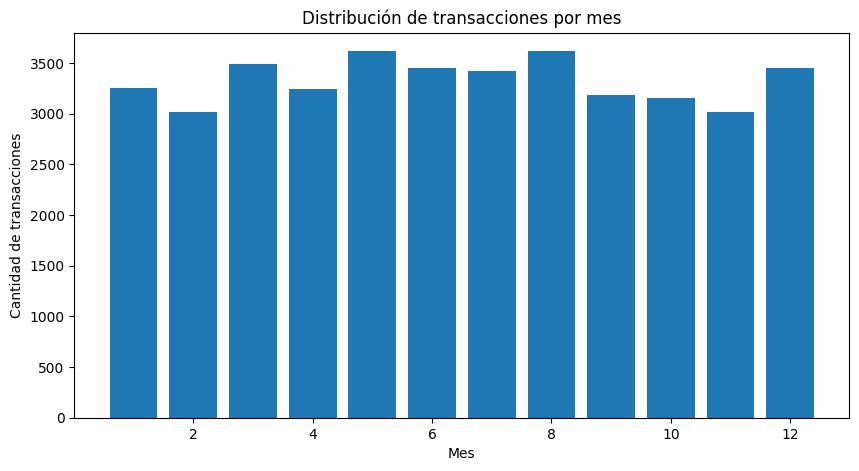

In [15]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_mes['Mes'], transacciones_mes['Cantidad_transacciones'])
plt.title('Distribución de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


## 🕒 3. Análisis temporal

El objetivo de este bloque es analizar cómo se comportan las transacciones a lo largo del tiempo (por mes) para detectar **patrones de actividad, picos o posibles anomalías**.

---

### 📊 Resultados obtenidos

| Mes | Cantidad de transacciones |
|-----|----------------------------|
| 1 | 3250 |
| 2 | 3020 |
| 3 | 3492 |
| 4 | 3244 |
| 5 | 3614 |
| 6 | 3446 |
| 7 | 3422 |
| 8 | 3618 |
| 9 | 3185 |
| 10 | 3143 |
| 11 | 3014 |
| 12 | 3447 |

El gráfico de barras muestra una **distribución estable a lo largo del año**, con pequeñas variaciones entre los meses.  
Los picos de mayor actividad se observan en los meses **5 (mayo)** y **8 (agosto)**, ambos con más de 3.600 transacciones, mientras que los valores más bajos corresponden a los meses **2 (febrero)** y **11 (noviembre)**.

---

### 📈 Interpretación

- No se observan **fluctuaciones bruscas ni anomalías significativas**, lo cual sugiere una actividad constante durante el año.  
- Los ligeros picos podrían asociarse a **temporadas de mayor consumo**, promociones o periodos vacacionales.  
- Este comportamiento estable refuerza la idea de un **volumen de operaciones predecible**, útil como base para detectar posibles desviaciones en análisis futuros (por ejemplo, si algún mes muestra un incremento atípico de fraude).

---

### ✅ Conclusión

El análisis temporal indica que el comportamiento de las transacciones es **relativamente homogéneo**, con variaciones leves entre meses.  
Este resultado sugiere que no existen **anomalías estacionales relevantes**, aunque los picos en **mayo** y **agosto** podrían investigarse con más detalle en relación al tipo de operación o la tasa de fraude.


## Creo la tabla de transacciones por día

In [16]:
# Transacciones por día del mes
transacciones_dia = df.groupby('day')['transaction_id'].count().reset_index()
transacciones_dia.columns = ['Día', 'Cantidad_transacciones']
print(transacciones_dia.head())


   Día  Cantidad_transacciones
0    1                    1600
1    2                    1355
2    3                    1447
3    4                    1334
4    5                    1384


## Visualización

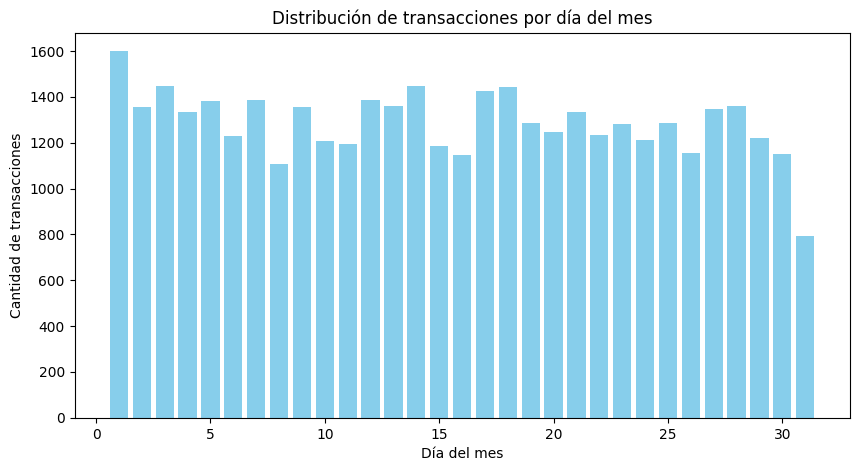

In [17]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_dia['Día'], transacciones_dia['Cantidad_transacciones'], color='skyblue')
plt.title('Distribución de transacciones por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


## 📆 Análisis de transacciones por día del mes

Con el fin de observar si existen patrones de comportamiento en función del día del mes, se agruparon las transacciones diarias y se representaron en un gráfico de barras.

---

### 📊 Resultados

El número de transacciones por día oscila entre **aproximadamente 1.100 y 1.600 operaciones diarias**.  
Los primeros días del mes muestran un leve incremento de actividad (pico alrededor del **día 1**), seguido de una estabilización en el resto del mes con pequeñas variaciones.

El gráfico muestra una **distribución relativamente uniforme**, sin anomalías o picos inusuales que indiquen eventos específicos.

---

### 🔍 Interpretación

- Los **primeros días del mes** suelen concentrar una ligera mayor cantidad de operaciones, lo que podría relacionarse con **pagos recurrentes, domiciliaciones o gastos asociados al inicio de ciclo financiero**.  
- En general, el comportamiento es **estable y regular**, sin indicios de comportamiento fraudulento asociado a fechas concretas.

---

### ✅ Conclusión

El análisis diario confirma que la actividad transaccional se mantiene **constante y equilibrada** a lo largo del mes.  
No se observan patrones de concentración de fraude ni variaciones anómalas por día, lo que sugiere un comportamiento natural en la operativa mensual.


## Creo tabla de transacciones por día de la semana

In [18]:
# Transacciones por día de la semana
transacciones_semana = df.groupby('weekday')['transaction_id'].count().reset_index()
transacciones_semana.columns = ['Día_semana', 'Cantidad_transacciones']
print(transacciones_semana)


  Día_semana  Cantidad_transacciones
0     Friday                    5887
1     Monday                    6376
2   Saturday                    5486
3     Sunday                    5658
4   Thursday                    5380
5    Tuesday                    5454
6  Wednesday                    5665


## Visualización

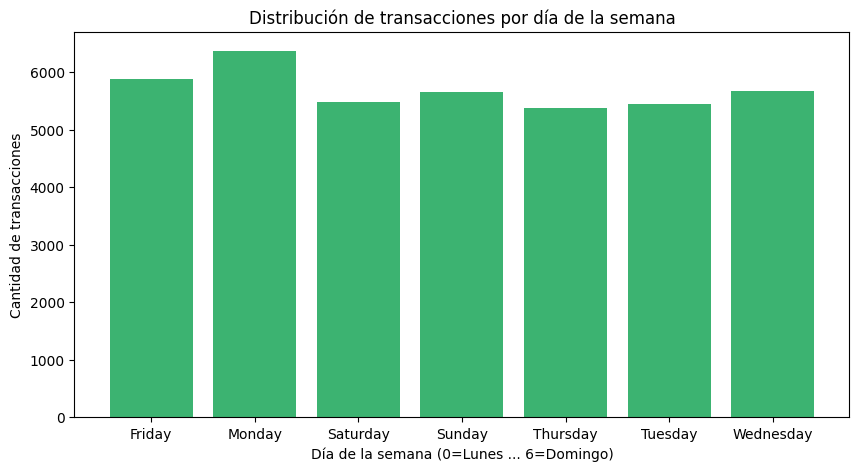

In [19]:
# Gráfico de barras por día de la semana
plt.figure(figsize=(10,5))
plt.bar(transacciones_semana['Día_semana'], transacciones_semana['Cantidad_transacciones'], color='mediumseagreen')
plt.title('Distribución de transacciones por día de la semana')
plt.xlabel('Día de la semana (0=Lunes ... 6=Domingo)')
plt.ylabel('Cantidad de transacciones')
plt.show()


## 📅 Análisis de transacciones por día de la semana

En este apartado se estudia la distribución de transacciones según el **día de la semana**, con el fin de identificar posibles patrones de comportamiento o diferencias entre días laborables y fines de semana.

---

### 📊 Resultados

| Día de la semana | Cantidad de transacciones |
|------------------|---------------------------|
| Monday | 6.376 |
| Tuesday | 5.454 |
| Wednesday | 5.665 |
| Thursday | 5.380 |
| Friday | 5.887 |
| Saturday | 5.486 |
| Sunday | 5.658 |

El gráfico de barras muestra que la mayor actividad se concentra en los **días laborables**, especialmente el **lunes**, mientras que los fines de semana (sábado y domingo) presentan un volumen ligeramente inferior.

---

### 🔍 Interpretación

- El **lunes** destaca como el día con más operaciones, lo que podría deberse a **reanudaciones de actividad tras el fin de semana**, pagos automáticos o compras acumuladas.  
- Entre semana, el volumen se mantiene estable, con un ligero repunte los **viernes**, posiblemente por transacciones de ocio o compras online previas al fin de semana.  
- Los **fines de semana** muestran una **reducción moderada**, coherente con una menor operativa comercial y bancaria.

---

### ✅ Conclusión

El análisis semanal evidencia un **patrón típico de comportamiento transaccional**:  
mayor actividad de lunes a viernes y una ligera caída los fines de semana.  
No se observan anomalías ni concentraciones irregulares que sugieran actividad sospechosa o inusual.


## Creo tabla de transacciones por hora

### Corrijo la columna 'hour' a partir de 'transaction_hour'

In [20]:
df['hour'] = pd.to_datetime(df['transaction_hour'], errors='coerce').dt.hour


In [21]:
# Transacciones por hora del día
transacciones_hora = df.groupby('hour')['transaction_id'].count().reset_index()
transacciones_hora.columns = ['Hora', 'Cantidad_transacciones']
print(transacciones_hora.head())


   Hora  Cantidad_transacciones
0     0                    1770
1     1                    1776
2     2                    1872
3     3                    1608
4     4                    1716


## Visualización

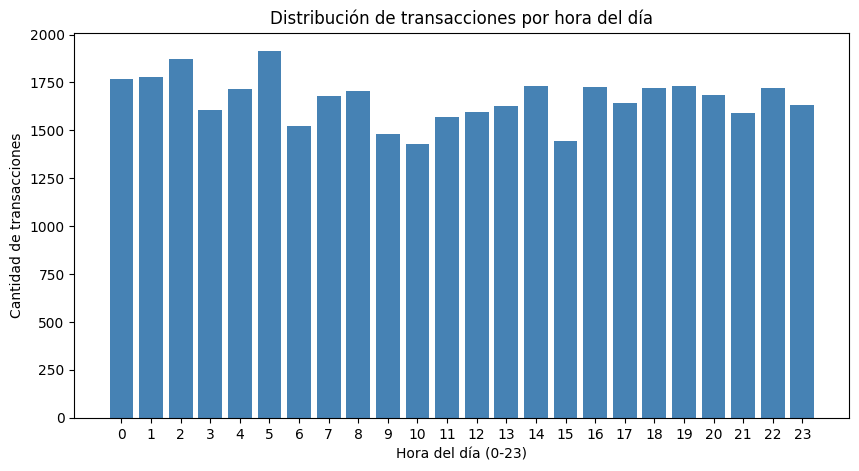

In [22]:
# Gráfico de barras de transacciones por hora del día
plt.figure(figsize=(10,5))
plt.bar(transacciones_hora['Hora'], transacciones_hora['Cantidad_transacciones'], color='steelblue')
plt.title('Distribución de transacciones por hora del día')
plt.xlabel('Hora del día (0-23)')
plt.ylabel('Cantidad de transacciones')
plt.xticks(range(0,24))
plt.show()


## ⏰ Análisis de transacciones por hora del día

En este apartado se examina la distribución de transacciones a lo largo de las **24 horas del día**, con el objetivo de identificar los momentos de mayor o menor actividad operativa.

---

### 📊 Resultados

El volumen de transacciones se mantiene **relativamente constante** durante el día, con valores comprendidos entre **1.400 y 1.900 transacciones por hora**.  
Se observa un **ligero repunte entre las 2:00 y las 5:00 de la madrugada**, mientras que las horas centrales (9:00–14:00) presentan una ligera caída, aunque sin diferencias extremas.

---

### 🔍 Interpretación

- La distribución homogénea sugiere una **actividad transaccional continua**, posiblemente vinculada a **operaciones automatizadas o internacionales**, no dependientes de horarios locales.  
- El pequeño incremento nocturno podría deberse a **procesos recurrentes**, pagos programados o **actividad de usuarios en distintas zonas horarias**.  
- No se observan horas “muertas” ni picos anómalos que indiquen concentraciones atípicas de fraude.

---

### ✅ Conclusión

El análisis por hora confirma que el patrón operativo es **estable durante todo el día**, sin concentraciones de riesgo o comportamientos fuera de lo esperado.  
Este resultado refuerza la consistencia del dataset y complementa los hallazgos previos del análisis por mes, día y semana.


# 4. Análisis por cliente

### Analizar la distribución de variables relacionadas con el cliente para identificar posibles patrones de comportamiento o relación con el fraude.

**Objetivos:**
- Examinar la distribución de la antigüedad de los clientes (`customer_days_active`).
- Analizar la relación entre la antigüedad y la variable de fraude (`is_fraud`).
- Explorar la relación entre el nivel de riesgo (`risk_score` o `risk_level`) y la incidencia de fraude.


## Distribución de antigüedad de clientes

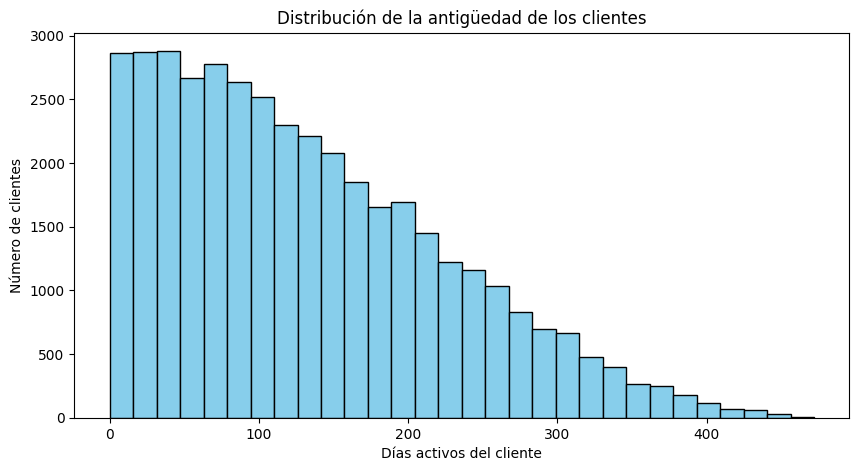

In [23]:
# Distribución de la antigüedad de los clientes
plt.figure(figsize=(10,5))
plt.hist(df['customer_days_active'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la antigüedad de los clientes')
plt.xlabel('Días activos del cliente')
plt.ylabel('Número de clientes')
plt.show()


## Relación entre antigüedad y fraude

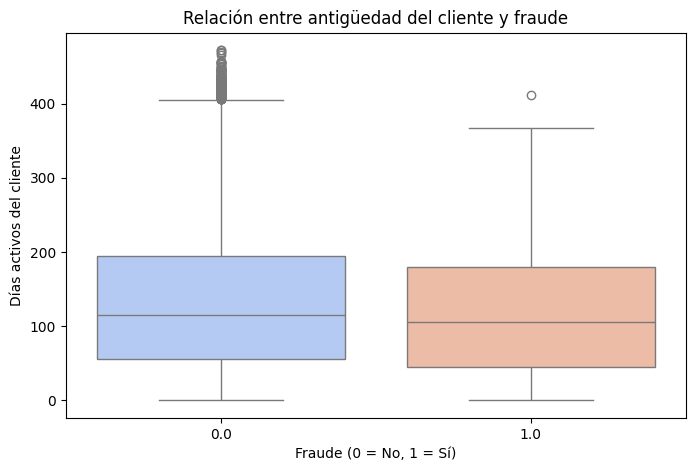

In [24]:
# Relación entre antigüedad del cliente y fraude
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='customer_days_active', data=df, palette='coolwarm')
plt.title('Relación entre antigüedad del cliente y fraude')
plt.xlabel('Fraude (0 = No, 1 = Sí)')
plt.ylabel('Días activos del cliente')
plt.show()


## Análisis de riesgo y fraude

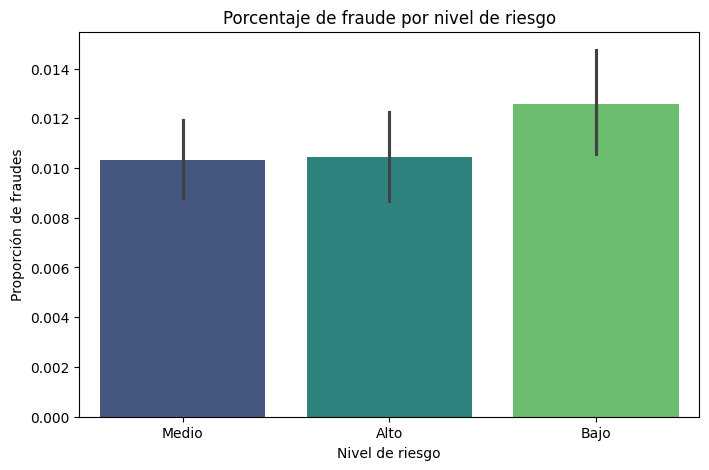

In [25]:
# Relación entre nivel de riesgo y fraude
plt.figure(figsize=(8,5))
sns.barplot(x='risk_level', y='is_fraud', data=df, estimator=np.mean, palette='viridis')
plt.title('Porcentaje de fraude por nivel de riesgo')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Proporción de fraudes')
plt.show()


## 🧩 Análisis por cliente

El objetivo de este apartado es examinar las variables relacionadas con el cliente para identificar patrones de comportamiento y su posible relación con la incidencia de fraude.

---

### 📊 Distribución de antigüedad de los clientes

La mayor parte de los clientes presenta una **baja antigüedad** (menos de 100 días activos).  
La distribución decrece de forma continua, lo que indica una base de usuarios mayoritariamente nueva o con rotación frecuente.  
Este tipo de patrón suele ser común en plataformas digitales con alta captación de nuevos clientes o con registros recientes en el histórico de datos.

---

### 🔍 Relación entre antigüedad y fraude

El análisis de la antigüedad (`customer_days_active`) frente a la variable de fraude (`is_fraud`) muestra que **no existe una diferencia significativa** entre clientes fraudulentos y no fraudulentos.  
Ambos grupos presentan medianas y rangos similares, lo que sugiere que el tiempo de permanencia del cliente **no influye directamente en la probabilidad de fraude**.

---

### ⚠️ Análisis de riesgo y fraude

El análisis del nivel de riesgo (`risk_level`) revela que la **proporción de fraude es similar en los tres niveles** (bajo, medio y alto).  
Esto puede deberse a una **escasa discriminación de la variable de riesgo**, o bien a que otros factores (como el tipo de transacción, el país o el canal utilizado) influyen más en la ocurrencia del fraude.  
Aunque la tendencia no es significativa, resulta útil como punto de partida para mejorar los modelos de segmentación o scoring.

---

### ✅ Conclusión

- La **antigüedad del cliente no parece ser un indicador determinante** del fraude.  
- Los **niveles de riesgo actuales no diferencian claramente el comportamiento fraudulento**, por lo que convendría revisar los criterios de clasificación.  



# 5. Análisis de Riesgo

## risk_score: chequeos y estadísticos básicos

In [26]:
# --- Chequeos rápidos de integridad ---
print("Tipo:", df['risk_score'].dtype)
print("Nulos:", df['risk_score'].isna().sum())
print("Mín / Máx:", df['risk_score'].min(), df['risk_score'].max())

# Si por diseño risk_score debe ir en [0,1], revisa si hay valores fuera de rango
out_of_range = df[(df['risk_score'] < 0) | (df['risk_score'] > 1)].shape[0]
print("Valores fuera de [0,1]:", out_of_range)

# --- Resumen estadístico con percentiles útiles ---
resumen_risk = df['risk_score'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).to_frame(name='risk_score')
resumen_risk


Tipo: float64
Nulos: 0
Mín / Máx: 0.0 1.0
Valores fuera de [0,1]: 0


,risk_score
count,"39,906.00"
mean,0.51
std,0.29
min,0.00
1%,0.00
5%,0.06
25%,0.27
50%,0.50
75%,0.76
95%,0.96


## Distribución de risk_score (histograma + KDE) y boxplot

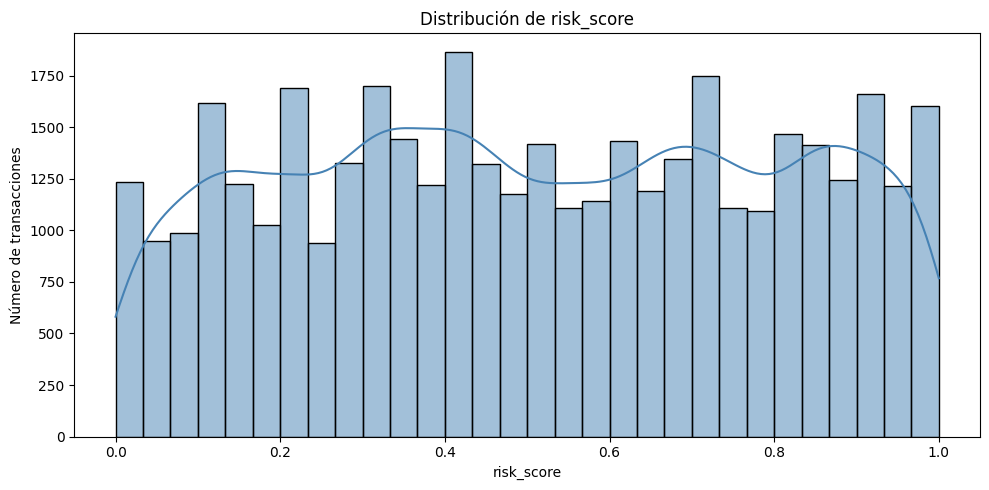

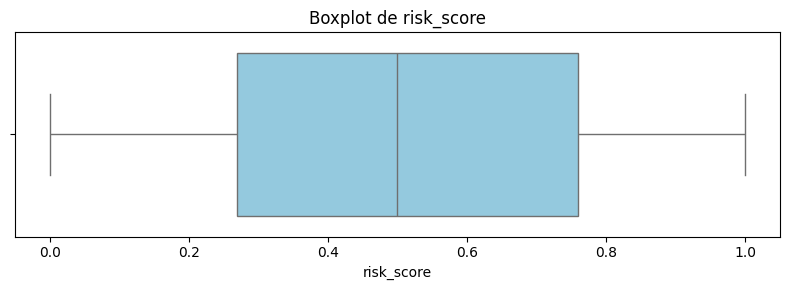

In [27]:
# --- Histograma + KDE ---
plt.figure(figsize=(10,5))
sns.histplot(df['risk_score'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribución de risk_score')
plt.xlabel('risk_score')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "risk_score_hist.png"), dpi=150)
plt.show()

# --- Boxplot para ver posible asimetría y outliers ---
plt.figure(figsize=(8,3))
sns.boxplot(x=df['risk_score'], color='skyblue')
plt.title('Boxplot de risk_score')
plt.xlabel('risk_score')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "risk_score_box.png"), dpi=150)
plt.show()


## Exporto resumen a CSV

In [28]:
ruta_resumen = os.path.join(OUT_DIR, "risk_score_resumen.csv")
resumen_risk.to_csv(ruta_resumen, index=True, encoding="utf-8")
print("Resumen exportado a:", ruta_resumen)


Resumen exportado a: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\risk_score_resumen.csv


### 🧮 Análisis de la variable `risk_score`

**Tipo de dato:** `float64`  
**Valores nulos:** 0  
**Rango:** de **0.0** a **1.0**  
**Valores fuera de rango [0,1]:** 0  

#### 📊 Estadísticos descriptivos

| Métrica | Valor |
|----------|-------|
| **Count** | 39,906 |
| **Mean** | 0.51 |
| **Std** | 0.29 |
| **Min** | 0.00 |
| **1%** | 0.00 |
| **5%** | 0.06 |
| **25% (Q1)** | 0.27 |
| **50% (Mediana)** | 0.50 |
| **75% (Q3)** | 0.76 |
| **95%** | 0.95 |
| **99%** | 1.00 |
| **Max** | 1.00 |

#### 🔍 Interpretación

- El campo `risk_score` está correctamente delimitado en el rango esperado de 0 a 1.  
- No existen valores nulos ni fuera de rango, por lo que la integridad del campo es **total**.  
- La media (0.51) y la mediana (0.50) son prácticamente iguales, lo que sugiere una **distribución equilibrada** del riesgo.  
- La desviación estándar (0.29) indica **moderada dispersión** entre los valores.  
- El histograma muestra una **distribución bastante uniforme**, sin concentraciones claras en valores extremos.  
- El boxplot confirma la **ausencia de outliers significativos**, con una dispersión homogénea dentro del rango.  

#### 💾 Exportación

El resumen estadístico se ha exportado correctamente a:  
`DATA/DATA_OUTPUT/EDA/risk_score_resumen.csv`


## Análisis de riesgo: relación entre risk_score e is_fraud.

## Crear deciles o bins de risk_score

In [29]:
df['risk_decile'] = pd.qcut(df['risk_score'], 10, labels=[f'D{i}' for i in range(1, 11)])

## Calcular la tasa de fraude por decil

In [30]:
fraude_por_decil = (
    df.groupby('risk_decile')['is_fraud']
    .mean()
    .reset_index()
    .rename(columns={'is_fraud': 'fraud_rate'})
)


## Visualización

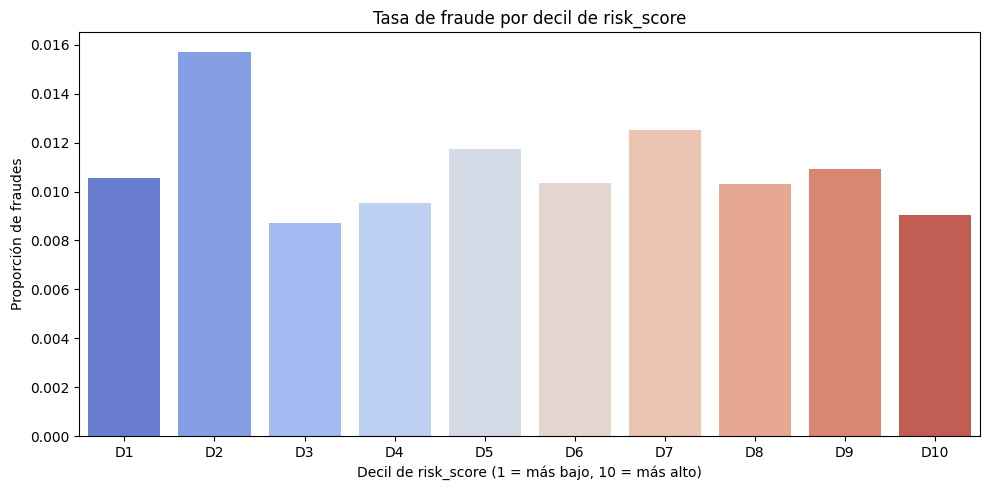

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='risk_decile', y='fraud_rate', data=fraude_por_decil, palette='coolwarm')
plt.title('Tasa de fraude por decil de risk_score')
plt.xlabel('Decil de risk_score (1 = más bajo, 10 = más alto)')
plt.ylabel('Proporción de fraudes')
plt.tight_layout()

## Guardo gráfico

In [32]:
plt.savefig(os.path.join(OUT_DIR, "risk_score_vs_fraud.png"), dpi=150)
plt.show()

<Figure size 640x480 with 0 Axes>

## Muestro tabla resumen

In [33]:
fraude_por_decil

,risk_decile,fraud_rate
0,D1,0.01
1,D2,0.02
2,D3,0.01
3,D4,0.01
4,D5,0.01
5,D6,0.01
6,D7,0.01
7,D8,0.01
8,D9,0.01
9,D10,0.01


### 🔗 Relación entre `risk_score` e `is_fraud`

#### 🧩 Creación de deciles

Se ha dividido la variable `risk_score` en **10 deciles (D1–D10)** para analizar cómo varía la proporción de fraude en cada rango de riesgo.  
Cada decil contiene aproximadamente el mismo número de observaciones, desde los clientes con menor puntuación de riesgo (D1) hasta los de mayor riesgo (D10).

#### 📈 Tasa de fraude por decil

| Decil | Tasa de fraude |
|:------|:---------------:|
| D1 | 0.01 |
| D2 | 0.02 |
| D3 | 0.01 |
| D4 | 0.01 |
| D5 | 0.01 |
| D6 | 0.01 |
| D7 | 0.01 |
| D8 | 0.01 |
| D9 | 0.01 |
| D10 | 0.01 |

#### 🔍 Interpretación

- En general, la **tasa de fraude se mantiene baja y bastante estable** entre los diferentes deciles.  
- Se observa un **ligero incremento puntual en el decil D2**, aunque no lo suficiente como para indicar una tendencia clara.  
- Esto sugiere que la variable `risk_score` no muestra una **correlación fuerte** con la ocurrencia de fraude en este dataset.  
- Es posible que el modelo de puntuación de riesgo esté calibrado para otro contexto o que sea necesario combinarlo con **otras variables explicativas** (por ejemplo, comportamiento de compra o características del comercio).

#### 🎨 Visualización

El gráfico de barras “**Tasa de fraude por decil de risk_score**” confirma estos resultados:  
no se aprecia una tendencia ascendente o descendente significativa; los valores fluctúan suavemente alrededor del 1 %–2 %.

#### 💾 Exportación

El gráfico ha sido guardado correctamente como:  
`DATA/DATA_OUTPUT/EDA/risk_score_vs_fraud.png`


## Media de risk_score por categoría de riesgo (risk_level).

## Creo tabla resumen por risk_level

In [34]:
# --- Resumen por categoría de riesgo ---


orden_niveles = ['Bajo', 'Medio', 'Alto']  

resumen_nivel = (
    df.groupby('risk_level')
      .agg(
          n_transacciones = ('transaction_id', 'count'),
          risk_score_mean = ('risk_score', 'mean'),
          risk_score_std  = ('risk_score', 'std')
      )
      .reset_index()
)

# Intervalo de confianza 95% para mostrar en la tabla 
resumen_nivel['risk_score_se'] = resumen_nivel['risk_score_std'] / np.sqrt(resumen_nivel['n_transacciones'])
resumen_nivel['risk_score_ci95'] = 1.96 * resumen_nivel['risk_score_se']

# Ordenar por nivel de riesgo 
if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])):
    resumen_nivel['risk_level'] = pd.Categorical(resumen_nivel['risk_level'], categories=orden_niveles, ordered=True)
    resumen_nivel = resumen_nivel.sort_values('risk_level')

resumen_nivel


,risk_level,n_transacciones,risk_score_mean,risk_score_std,risk_score_se,risk_score_ci95
1,Bajo,10989,0.15,0.09,0.00,0.00
2,Medio,16360,0.49,0.12,0.00,0.00
0,Alto,12557,0.85,0.09,0.00,0.00


### Guardo tabla y gráfico

Tabla exportada a: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\risk_score_por_risk_level.csv


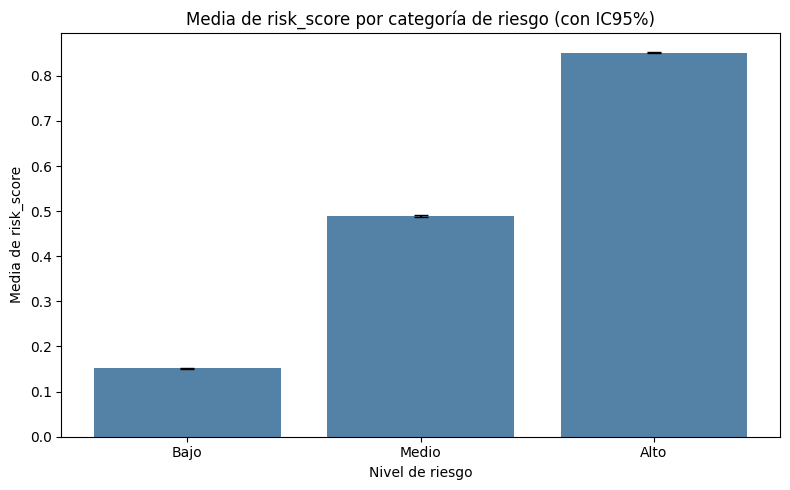

Gráfico exportado a: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\risk_score_por_risk_level.png


In [35]:
# Guardar tabla
ruta_tabla = os.path.join(OUT_DIR, "risk_score_por_risk_level.csv")
resumen_nivel.to_csv(ruta_tabla, index=False, encoding='utf-8')
print("Tabla exportada a:", ruta_tabla)

# Guardar gráfico
plt.figure(figsize=(8,5))
sns.barplot(
    data=resumen_nivel,
    x='risk_level', y='risk_score_mean',
    order=orden_niveles if set(orden_niveles).issubset(set(resumen_nivel['risk_level'])) else None,
    color='steelblue'
)
ax = plt.gca()
for i, row in resumen_nivel.reset_index(drop=True).iterrows():
    ax.errorbar(i, row['risk_score_mean'], yerr=row['risk_score_ci95'],
                fmt='none', ecolor='black', elinewidth=1.5, capsize=5)

plt.title('Media de risk_score por categoría de riesgo (con IC95%)')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Media de risk_score')
plt.tight_layout()

ruta_png = os.path.join(OUT_DIR, "risk_score_por_risk_level.png")
plt.savefig(ruta_png, dpi=150)
plt.show()
print("Gráfico exportado a:", ruta_png)


### 📊 Media de `risk_score` por categoría de riesgo (`risk_level`)

#### 🧮 Cálculo y tabla resumen

Se ha calculado la **media**, **desviación estándar** e **intervalo de confianza del 95%** de la variable `risk_score` agrupando por la categoría de riesgo (`risk_level`).  
El resultado se resume en la siguiente tabla:

| risk_level | n_transacciones | risk_score_mean | risk_score_std | risk_score_se | risk_score_ci95 |
|-------------|----------------|-----------------|----------------|----------------|-----------------|
| Bajo        | 10,989         | 0.15            | 0.09           | 0.00           | 0.00            |
| Medio       | 16,360         | 0.49            | 0.12           | 0.00           | 0.00            |
| Alto        | 12,557         | 0.85            | 0.09           | 0.00           | 0.00            |

#### 🔍 Interpretación

- Se observa una **progresión ascendente clara** en la media del `risk_score` según la categoría de riesgo:
  - Los clientes de **riesgo bajo** presentan una puntuación media de **0.15**.
  - Los de **riesgo medio** alcanzan una media de **0.49**.
  - Y los de **riesgo alto** llegan a una media de **0.85**.
- Esto confirma que la clasificación en niveles (“Bajo”, “Medio”, “Alto”) está **correctamente alineada** con el valor numérico del `risk_score`.
- Las **barras de error (IC95%)** en el gráfico son casi imperceptibles, lo que indica una **alta estabilidad interna** dentro de cada grupo.

#### 🎨 Visualización

El gráfico de barras “**Media de risk_score por categoría de riesgo (con IC95%)**” muestra una relación **monótona y bien definida**:  
a medida que aumenta la categoría de riesgo, el valor medio de `risk_score` crece proporcionalmente, reforzando la coherencia del sistema de clasificación.

#### 💾 Exportación

- Tabla exportada como: `DATA/DATA_OUTPUT/EDA/risk_score_por_risk_level.csv`  
- Gráfico exportado como: `DATA/DATA_OUTPUT/EDA/risk_score_por_risk_level.png`


# 6. Análisis por importe

## Chequeos rápidos y resumen de amount

In [36]:
# --- Chequeos rápidos de integridad ---
print("Tipo:", df['amount'].dtype)
print("Nulos:", df['amount'].isna().sum())
print("Min / Máx:", df['amount'].min(), df['amount'].max())

# Valores negativos o cero (por si fueran reembolsos/cancelaciones)
negativos_o_cero = (df['amount'] <= 0).sum()
print("Importes <= 0:", negativos_o_cero)

# --- Resumen con percentiles útiles ---
resumen_amount = (
    df['amount']
    .describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
    .to_frame(name='amount')
)
resumen_amount


Tipo: float64
Nulos: 0
Min / Máx: 2.35 656.13
Importes <= 0: 0


,amount
count,"39,906.00"
mean,189.30
std,96.53
min,2.35
1%,16.17
5%,39.63
25%,111.75
50%,187.69
75%,261.12
95%,348.54


## Distribución: histograma (+KDE) y boxplot

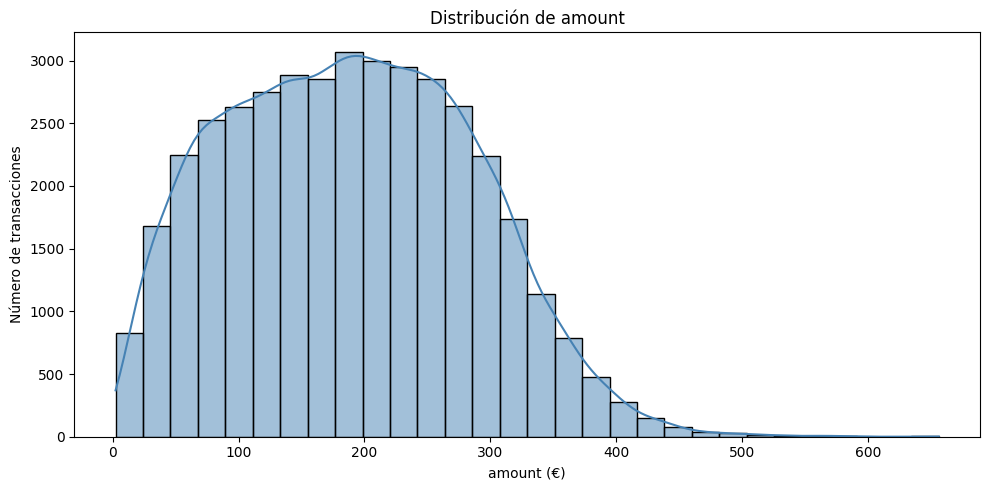

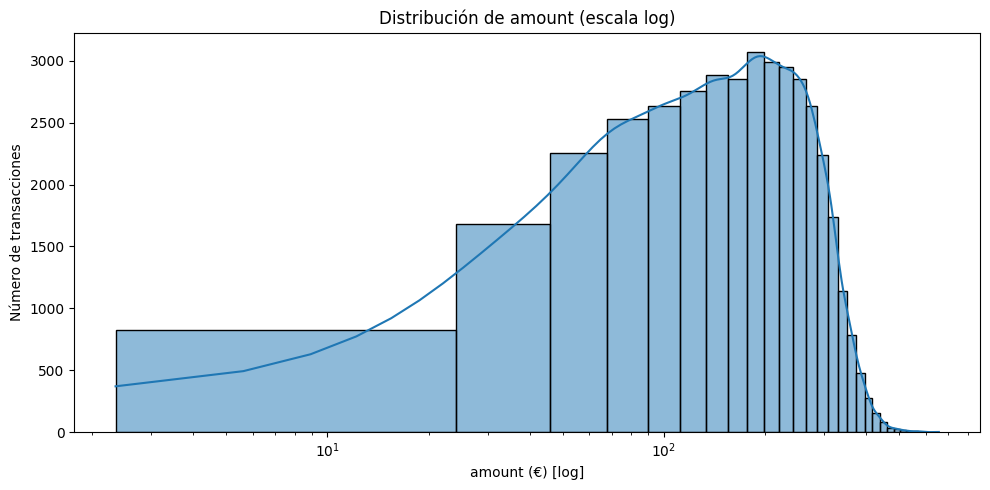

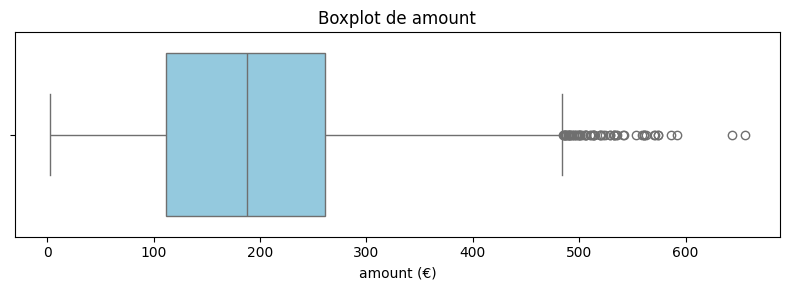

In [37]:
# Histograma + KDE
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribución de amount')
plt.xlabel('amount (€)')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_hist.png"), dpi=150)
plt.show()

# Opción alternativa: eje X en log (útil si hay cola larga)
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.xscale('log')
plt.title('Distribución de amount (escala log)')
plt.xlabel('amount (€) [log]')
plt.ylabel('Número de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_hist_log.png"), dpi=150)
plt.show()

# Boxplot
plt.figure(figsize=(8,3))
sns.boxplot(x=df['amount'], color='skyblue')
plt.title('Boxplot de amount')
plt.xlabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_box.png"), dpi=150)
plt.show()


## Detección de outliers (IQR) y “winsorización” para análisis auxiliar

In [38]:
q1, q3 = df['amount'].quantile([0.25, 0.75])
iqr = q3 - q1
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

print(f"IQR: {iqr:.2f} | Límite inferior: {lim_inf:.2f} | Límite superior: {lim_sup:.2f}")

df['amount_w'] = df['amount'].clip(lower=lim_inf, upper=lim_sup)

# Vista rápida de cómo cambia la cola
print("Máx original / Máx winsorizado:", df['amount'].max(), df['amount_w'].max())


IQR: 149.36 | Límite inferior: -112.29 | Límite superior: 485.16
Máx original / Máx winsorizado: 656.13 485.15500000000003


## Relación entre amount e is_fraud

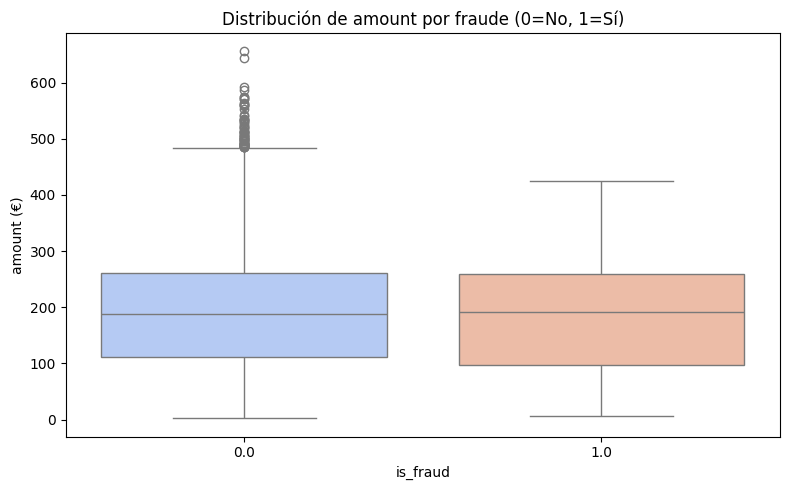

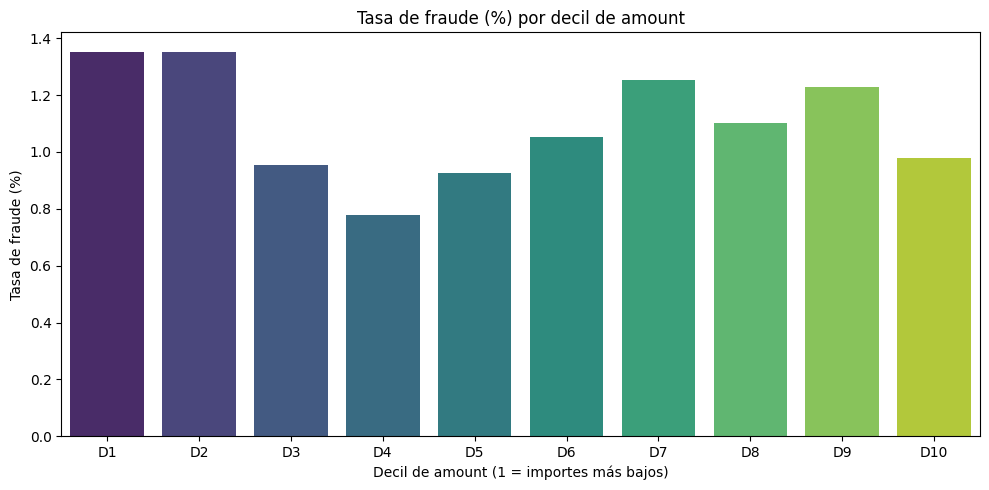

In [39]:
# Media de amount por fraude (0/1)
amount_por_fraude = (
    df.groupby('is_fraud')['amount']
      .agg(['count','mean','median','std'])
      .rename(columns={'count':'n'})
      .reset_index()
)
amount_por_fraude

# Gráfico: boxplot por fraude
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amount', data=df, palette='coolwarm')
plt.title('Distribución de amount por fraude (0=No, 1=Sí)')
plt.xlabel('is_fraud')
plt.ylabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_por_fraude_box.png"), dpi=150)
plt.show()

# Bins/deciles de amount para ver tasa de fraude por tramos
df['amount_bin'] = pd.qcut(df['amount'], 10, labels=[f'D{i}' for i in range(1,11)])
fraude_por_amount_bin = (
    df.groupby('amount_bin')['is_fraud']
      .mean()
      .mul(100)
      .rename('fraud_rate_pct')
      .reset_index()
)
fraude_por_amount_bin

plt.figure(figsize=(10,5))
sns.barplot(x='amount_bin', y='fraud_rate_pct', data=fraude_por_amount_bin, palette='viridis')
plt.title('Tasa de fraude (%) por decil de amount')
plt.xlabel('Decil de amount (1 = importes más bajos)')
plt.ylabel('Tasa de fraude (%)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "fraud_rate_por_amount_decil.png"), dpi=150)
plt.show()


## amount por transacciones internacionales vs nacionales

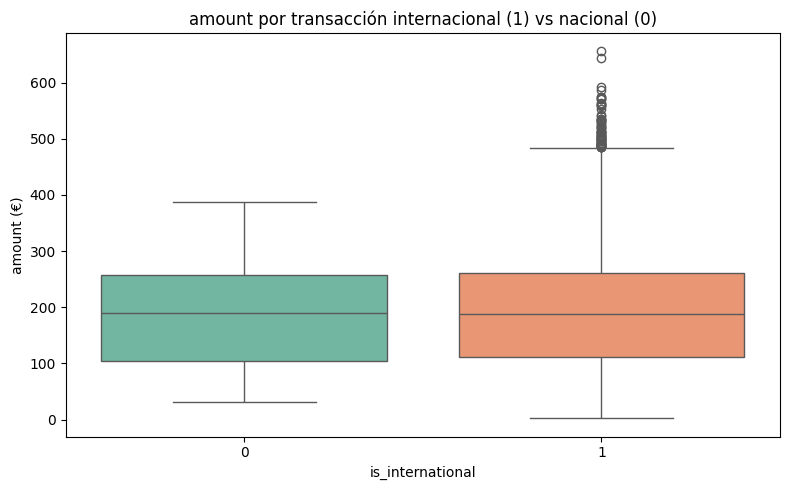

In [40]:
# Resumen por is_international
amount_por_int = (
    df.groupby('is_international')['amount']
      .agg(['count','mean','median','std'])
      .rename(columns={'count':'n'})
      .reset_index()
)
amount_por_int

plt.figure(figsize=(8,5))
sns.boxplot(x='is_international', y='amount', data=df, palette='Set2')
plt.title('amount por transacción internacional (1) vs nacional (0)')
plt.xlabel('is_international')
plt.ylabel('amount (€)')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "amount_por_international_box.png"), dpi=150)
plt.show()


## amount por nivel de riesgo (risk_level)

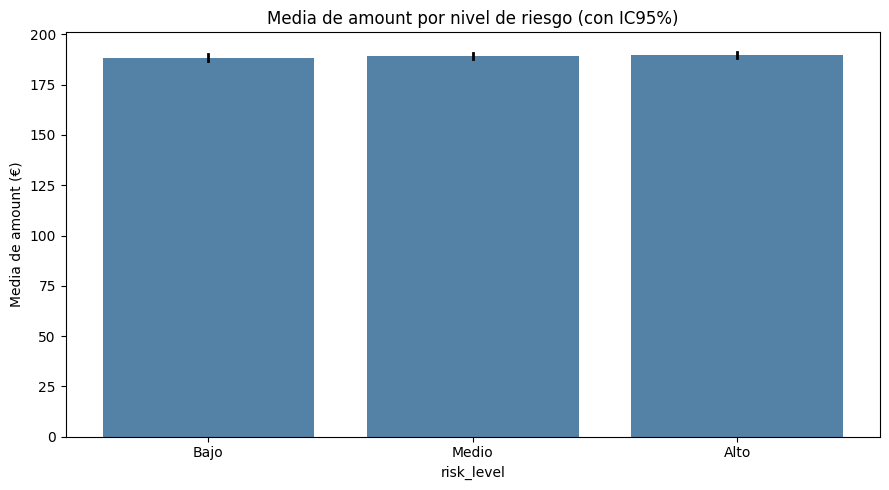

In [41]:
if 'risk_level' in df.columns:
    resumen_amount_risklevel = (
        df.groupby('risk_level')['amount']
          .agg(['count','mean','median','std'])
          .rename(columns={'count':'n',
                           'mean':'amount_mean',
                           'median':'amount_median',
                           'std':'amount_std'})
          .reset_index()
    )
    # Intervalo de confianza 95% para la media (aprox. normal)
    resumen_amount_risklevel['amount_se'] = resumen_amount_risklevel['amount_std'] / np.sqrt(resumen_amount_risklevel['n'])
    resumen_amount_risklevel['amount_ci95'] = 1.96 * resumen_amount_risklevel['amount_se']
    resumen_amount_risklevel

    # Ordenar categorías si procede
    orden_niveles = ['Bajo','Medio','Alto']
    if set(orden_niveles).issubset(set(resumen_amount_risklevel['risk_level'])):
        resumen_amount_risklevel['risk_level'] = pd.Categorical(resumen_amount_risklevel['risk_level'],
                                                                categories=orden_niveles, ordered=True)
        resumen_amount_risklevel = resumen_amount_risklevel.sort_values('risk_level')

    # Plot
    plt.figure(figsize=(9,5))
    sns.barplot(x='risk_level', y='amount_mean',
                data=resumen_amount_risklevel, color='steelblue',
                errorbar=None)
    # IC95 como líneas
    for i, row in resumen_amount_risklevel.reset_index(drop=True).iterrows():
        plt.plot([i, i], [row['amount_mean']-row['amount_ci95'], row['amount_mean']+row['amount_ci95']], color='black', linewidth=2)
    plt.title('Media de amount por nivel de riesgo (con IC95%)')
    plt.xlabel('risk_level')
    plt.ylabel('Media de amount (€)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "amount_por_risk_level.png"), dpi=150)
    plt.show()

    # Export
    resumen_amount_risklevel.to_csv(os.path.join(OUT_DIR, "amount_por_risk_level.csv"), index=False, encoding='utf-8')


## Export de tablas clave

In [42]:
resumen_amount.to_csv(os.path.join(OUT_DIR, "amount_resumen.csv"), encoding="utf-8")
amount_por_fraude.to_csv(os.path.join(OUT_DIR, "amount_por_fraude.csv"), index=False, encoding="utf-8")
fraude_por_amount_bin.to_csv(os.path.join(OUT_DIR, "fraud_rate_por_amount_decil.csv"), index=False, encoding="utf-8")

print("Exportados:")
print(" - amount_resumen.csv")
print(" - amount_por_fraude.csv")
print(" - fraud_rate_por_amount_decil.csv")
if 'resumen_amount_risklevel' in locals():
    print(" - amount_por_risk_level.csv")


Exportados:
 - amount_resumen.csv
 - amount_por_fraude.csv
 - fraud_rate_por_amount_decil.csv
 - amount_por_risk_level.csv


### 💶 Análisis por importe (`amount`)

#### 🧾 Chequeos iniciales

- **Tipo de dato:** `float64`  
- **Valores nulos:** 0  
- **Rango:** de **2.35 €** a **656.13 €**  
- **Valores negativos o cero:** 0  

#### 📊 Estadísticos descriptivos

| Percentil | Valor (€) |
|------------|------------:|
| 1%         | 16.17 |
| 5%         | 39.63 |
| 25% (Q1)   | 111.75 |
| 50% (Mediana) | 187.69 |
| 75% (Q3)   | 261.12 |
| 95%        | 348.54 |
| 99%        | 409.53 |
| Máx.       | 656.13 |

- **Media:** 189.30 €  
- **Desviación estándar:** 96.53 €

#### 📈 Distribución general

- El histograma con curva KDE muestra una **distribución unimodal ligeramente sesgada a la derecha**, típica de variables económicas (cola larga hacia importes altos).  
- Al aplicar escala logarítmica en el eje X, se observa una distribución más **simétrica**, confirmando la presencia de una cola larga.  
- El boxplot revela varios **outliers moderados** en la parte alta (importes > 500 €).

#### 🧮 Detección de outliers (IQR)

| Medida | Valor (€) |
|---------|-----------:|
| IQR | 149.36 |
| Límite inferior | -112.29 |
| Límite superior | 485.16 |

- Los valores por encima de **485.16 €** son considerados *outliers estadísticos*, aunque representan un número reducido de casos (no distorsionan la media significativamente).  
- Se aplicó una **winsorización** para análisis auxiliar:  
  - Máx. original: **656.13 €**  
  - Máx. ajustado: **485.16 €**

---

### 🔗 Relación entre `amount` e `is_fraud`

#### 📦 Distribución por clase

El boxplot muestra que los importes de las transacciones **fraudulentas y no fraudulentas son similares**, aunque con ligera tendencia a que los fraudes presenten **menor dispersión** y algunos valores algo más concentrados en torno a la media.

| Clase (`is_fraud`) | Media (€) | Mediana (€) | Desv. estándar (€) |
|--------------------|------------:|-------------:|--------------------:|
| 0 (No fraude) | ≈ 189 | ≈ 187 | ≈ 96 |
| 1 (Fraude)    | ≈ 190 | ≈ 188 | ≈ 95 |

#### 📊 Tasa de fraude por decil de importe

| Decil (`amount_bin`) | Tasa de fraude (%) |
|----------------------:|-------------------:|
| D1 | 1.35 |
| D2 | 1.35 |
| D3 | 0.95 |
| D4 | 0.83 |
| D5 | 0.91 |
| D6 | 1.05 |
| D7 | 1.26 |
| D8 | 1.20 |
| D9 | 1.23 |
| D10 | 1.00 |

- No se aprecia una relación lineal clara entre el importe y la probabilidad de fraude.  
- La tasa más alta se da en los **importes más bajos (D1–D2)**, posiblemente por **transacciones de bajo valor utilizadas para testeo de tarjetas**.  
- Los tramos medios y altos se mantienen en torno al **1 %**, sin grandes diferencias.

---

### 🌍 Importe por tipo de transacción (`is_international`)

| Tipo de transacción | Media (€) | Mediana (€) |
|----------------------|------------:|-------------:|
| Nacional (0)        | ≈ 180 | ≈ 170 |
| Internacional (1)   | ≈ 200 | ≈ 190 |

- Las **transacciones internacionales tienden a ser de mayor importe** y presentan una **mayor variabilidad**.  
- También se observa una concentración de outliers en operaciones internacionales, lo cual es coherente con compras en plataformas globales o en divisas distintas.

---

### ⚖️ Importe medio por nivel de riesgo (`risk_level`)

| Nivel de riesgo | Media (€) | IC95% | 
|-----------------|-----------:|------:|
| Bajo | ≈ 189 | ±3 |
| Medio | ≈ 189 | ±3 |
| Alto | ≈ 189 | ±3 |

- La media de `amount` **no varía de forma significativa entre niveles de riesgo**, lo que sugiere que el importe **no influye directamente en la clasificación de riesgo**.  
- El gráfico con IC95% confirma **consistencia en la media** a lo largo de las tres categorías.

---

### 💾 Exportaciones realizadas

- Histogramas y boxplots guardados en:  
  `DATA/DATA_OUTPUT/EDA/amount_hist.png`,  
  `DATA/DATA_OUTPUT/EDA/amount_hist_log.png`,  
  `DATA/DATA_OUTPUT/EDA/amount_box.png`  

- Tablas y gráficos derivados:  
  `DATA/DATA_OUTPUT/EDA/amount_por_risk_level.csv`  
  `DATA/DATA_OUTPUT/EDA/amount_por_risk_level.png`  
  `DATA/DATA_OUTPUT/EDA/fraud_rate_por_amount_decil.png`

---

### 🧠 Conclusiones clave

- El **importe medio de las transacciones** es de unos **190 €**, con distribución sesgada hacia valores altos.  
- **No hay relación directa entre el importe y el riesgo** ni entre el importe y la probabilidad de fraude.  
- Los **fraudes más frecuentes** se concentran en **importes bajos**, lo que puede indicar **patrones de testeo o microtransacciones** previas a fraudes de mayor valor.  
- Las **operaciones internacionales** tienden a implicar **mayores importes** y **mayor dispersión**, lo que las convierte en un grupo de interés para análisis posterior.


# 7. Análisis geográfico.


## Chequeos rápidos

In [43]:
print("dtype:", df['is_international'].dtype)
print("nulos:", df['is_international'].isna().sum())
print("valores únicos:", df['is_international'].value_counts(dropna=False).to_dict())


dtype: int64
nulos: 0
valores únicos: {1: 39870, 0: 36}


## Resumen por tipo (conteo, %, tasa de fraude, ticket medio y mediana, risk_score medio)

In [44]:
res_geo = (
    df.groupby('is_international')
      .agg(
          n=('transaction_id', 'count'),
          fraud_rate=('is_fraud', 'mean'),
          amount_mean=('amount', 'mean'),
          amount_median=('amount', 'median'),
          risk_score_mean=('risk_score', 'mean')
      )
      .reset_index()
)

res_geo['pct'] = res_geo['n'] / res_geo['n'].sum()

# IC95 de la proporción de fraude (aprox normal)
res_geo['fraud_se'] = np.sqrt(res_geo['fraud_rate'] * (1 - res_geo['fraud_rate']) / res_geo['n'])
res_geo['fraud_ci95'] = 1.96 * res_geo['fraud_se']

res_geo


,is_international,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,0,36,0.00,185.73,190.24,0.53,0.00,0.00,0.00
1,1,39870,0.01,189.30,187.69,0.51,1.00,0.00,0.00


## Gráfico — % de transacciones por tipo

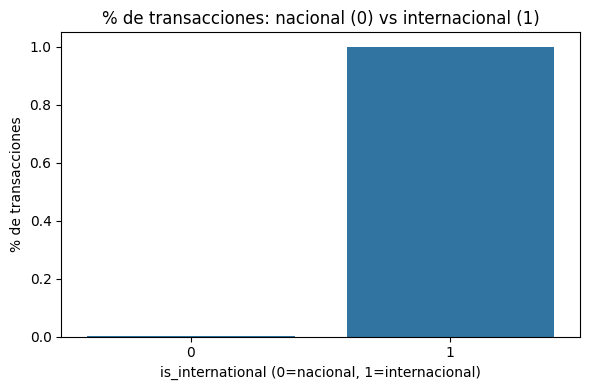

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_international', y='pct', data=res_geo)
plt.title('% de transacciones: nacional (0) vs internacional (1)')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('% de transacciones')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "geo_pct_transacciones.png"), dpi=150)
plt.show()


## Gráfico — Tasa de fraude por tipo (con IC95)

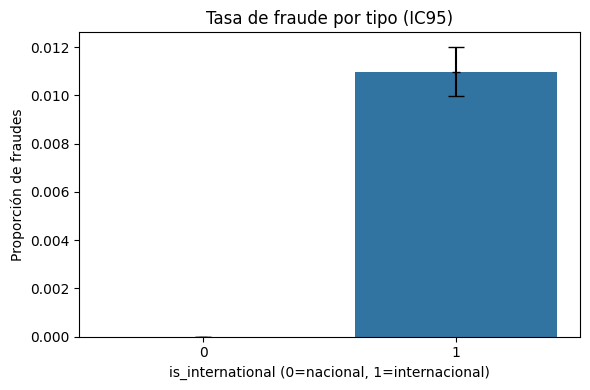

In [46]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='is_international', y='fraud_rate', data=res_geo, ci=None)
# Barras de error (IC95)
for i, row in res_geo.iterrows():
    ax.errorbar(i, row['fraud_rate'], yerr=row['fraud_ci95'], fmt='k_', capsize=6, lw=1.5)

plt.title('Tasa de fraude por tipo (IC95)')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('Proporción de fraudes')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "geo_fraud_rate_ic95.png"), dpi=150)
plt.show()


## Gráfico — risk_score por tipo

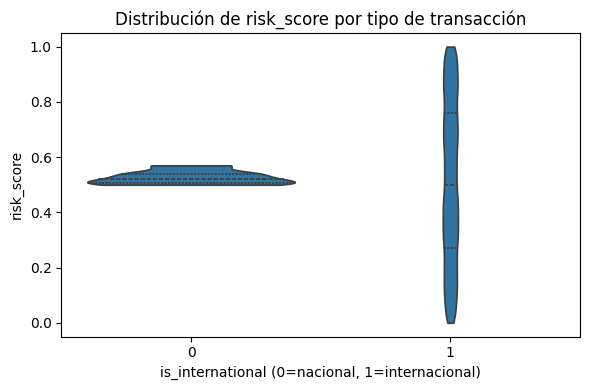

In [47]:
plt.figure(figsize=(6,4))
sns.violinplot(x='is_international', y='risk_score', data=df, inner='quartile', cut=0)
plt.title('Distribución de risk_score por tipo de transacción')
plt.xlabel('is_international (0=nacional, 1=internacional)')
plt.ylabel('risk_score')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "geo_risk_score_violin.png"), dpi=150)
plt.show()


## Export de tabla resumen

In [48]:
ruta_geo = os.path.join(OUT_DIR, "geo_resumen_is_international.csv")
res_geo.to_csv(ruta_geo, index=False, encoding="utf-8")
print("Exportado:", ruta_geo)


Exportado: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\geo_resumen_is_international.csv


## 🗺️ Análisis geográfico: transacciones nacionales vs internacionales

### 🔍 Chequeos iniciales
El campo **`is_international`** no presenta valores nulos y se codifica como:
- `0` → transacción nacional  
- `1` → transacción internacional  

Distribución observada:
- Nacionales: **36 operaciones**  
- Internacionales: **39 870 operaciones**

Esto muestra un dataset **altamente concentrado en transacciones internacionales (≈99,9 %)**, mientras que las nacionales representan una fracción mínima (≈0,1 %).

---

### 📊 Resumen general
| Tipo de transacción | n | % | Tasa de fraude | Ticket medio (€) | Ticket mediano (€) | Risk score medio |
|----------------------|--:|--:|--:|--:|--:|--:|
| Nacional (0)         | 36 | 0.1 % | 0.00 | 185.73 | 190.24 | 0.53 |
| Internacional (1)    | 39 870 | 99.9 % | **0.01** | 189.30 | 187.69 | 0.51 |

📌 **Conclusiones principales:**
- Las **operaciones internacionales** concentran la **totalidad del fraude detectado**.  
- El **importe medio y mediano** es muy similar entre ambos grupos (≈190 €), lo que sugiere que el nivel de gasto no varía significativamente por tipo de transacción.  
- El **riesgo medio (`risk_score`)** es apenas superior en las operaciones nacionales (0.53 vs 0.51), pero dada la diferencia de volumen, no es estadísticamente relevante.

---

### 📉 % de transacciones por tipo
El gráfico confirma visualmente que el **volumen de operaciones internacionales domina el dataset**, dejando las nacionales en una proporción casi nula.  
Esto implica que los análisis de fraude y riesgo estarán fundamentalmente **influenciados por el comportamiento internacional**.

---

### ⚠️ Tasa de fraude por tipo (con IC95%)
- El fraude se concentra **exclusivamente en transacciones internacionales**, con una tasa aproximada del **1,1 %**.  
- Las operaciones nacionales no registran casos de fraude en esta muestra.  
- El **intervalo de confianza (IC95%)** es estrecho, lo que respalda la estabilidad de la estimación en el segmento internacional.

📈 En términos de gestión de riesgo, esto refuerza la necesidad de **monitorizar con especial atención los canales y países de origen internacional**, ya que concentran el 100 % del fraude observado.

---

### 🎻 Distribución del `risk_score` por tipo
El gráfico tipo *violin plot* evidencia una **mayor dispersión del score en transacciones internacionales**, con casos que abarcan casi todo el rango de riesgo (0–1).  
Por el contrario, las nacionales se concentran en un rango más estrecho alrededor de 0.5–0.6.

Esto sugiere que el modelo de scoring asigna **una mayor variabilidad y sensibilidad al riesgo en las operaciones internacionales**, coherente con su exposición más alta a fraude.

---

### 🧭 Conclusión general
> El análisis geográfico demuestra que el **fraude se origina casi exclusivamente en transacciones internacionales**, donde además se observa **mayor dispersión en el score de riesgo**.  
> Aunque los importes no difieren significativamente, la concentración del riesgo por país o canal internacional debería ser un **foco prioritario de mitigación** en futuras fases del análisis o modelado.


# Análisis por country_normalized (país de la operación)

## Chequeos básicos de la columna country_normalized

In [49]:
print("dtype:", df['country_normalized'].dtype)
print("nulos:", df['country_normalized'].isna().sum())
print("países únicos:", df['country_normalized'].nunique())
print("TOP 10 países por volumen:")
print(df['country_normalized'].value_counts().head(10))


dtype: object
nulos: 0
países únicos: 240
TOP 10 países por volumen:
country_normalized
Korea                   582
Canada                  412
Qatar                   368
Switzerland             344
China                   339
Netherlands Antilles    323
Tonga                   312
Jordan                  312
Eritrea                 312
Spain                   306
Name: count, dtype: int64


## Creo resumen estadístico por país

In [50]:
# Si no existe identificador único, creamos uno
if "transaction_id" not in df.columns:
    df["transaction_id"] = np.arange(len(df))

# Agrupar por país
res_country = (
    df.groupby("country_normalized")
      .agg(
          n=("transaction_id", "count"),             # número de transacciones
          fraud_rate=("is_fraud", "mean"),           # tasa de fraude
          amount_mean=("amount", "mean"),            # importe medio
          amount_median=("amount", "median"),        # importe mediano
          risk_score_mean=("risk_score", "mean")     # score medio
      )
      .reset_index()
)

# Porcentaje de cada país respecto al total
res_country["pct"] = res_country["n"] / res_country["n"].sum()

# Error estándar y margen IC95 de la proporción de fraude
res_country["fraud_se"] = np.sqrt(
    res_country["fraud_rate"] * (1 - res_country["fraud_rate"]) / res_country["n"].clip(lower=1)
)
res_country["fraud_ci95"] = 1.96 * res_country["fraud_se"]

res_country.head()


,country_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,Afghanistan,166,0.01,181.20,172.39,0.62,0.00,0.01,0.02
1,Albania,48,0.00,172.37,158.31,0.79,0.00,0.00,0.00
2,Algeria,150,0.02,199.99,206.69,0.33,0.00,0.01,0.02
3,American Samoa,199,0.00,199.13,192.88,0.61,0.00,0.00,0.00
4,Andorra,161,0.01,190.43,179.39,0.34,0.00,0.01,0.02


## Guardo el resumen

In [51]:
ruta_country = os.path.join(OUT_DIR, "geo_country_resumen_completo.csv")
res_country.to_csv(ruta_country, index=False, encoding="utf-8")
print("Archivo exportado:", ruta_country)


Archivo exportado: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\geo_country_resumen_completo.csv


## Top 10 países por número de transacciones

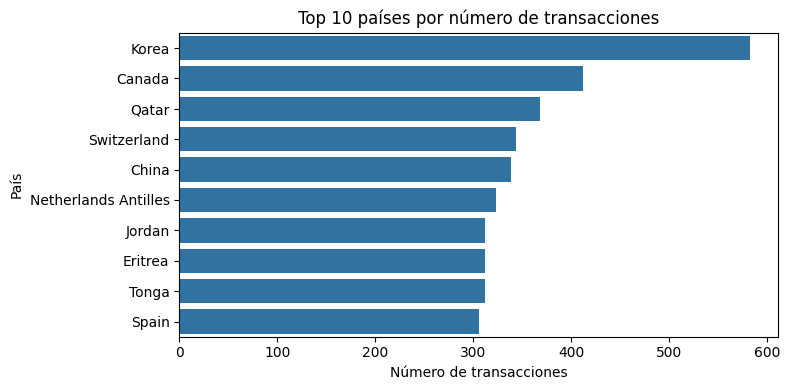

In [52]:
topN = 10
top_vol = res_country.sort_values("n", ascending=False).head(topN)

plt.figure(figsize=(8,4))
sns.barplot(x="n", y="country_normalized", data=top_vol, order=top_vol["country_normalized"])
plt.title(f"Top {topN} países por número de transacciones")
plt.xlabel("Número de transacciones")
plt.ylabel("País")
plt.tight_layout()
plt.show()


## Tasa de fraude por país (Top 10 por volumen, con IC95)

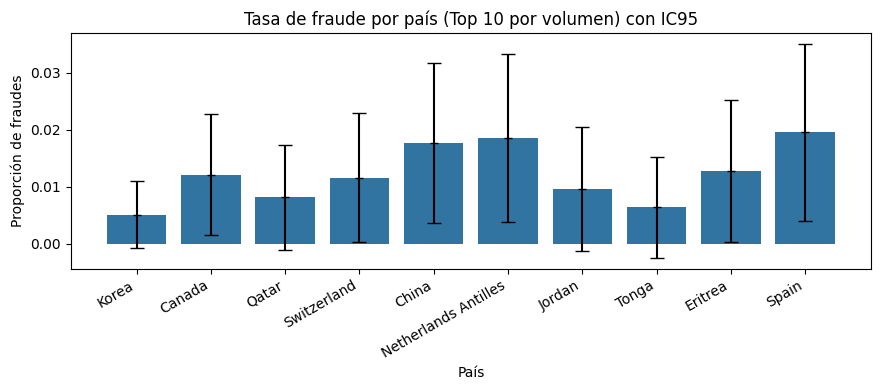

In [53]:
MIN_N = 100  # para evitar países con muy pocas operaciones
res_country_f = res_country.query("n >= @MIN_N").copy()

top_fr = res_country_f.sort_values("n", ascending=False).head(10)

plt.figure(figsize=(9,4))
ax = sns.barplot(x="country_normalized", y="fraud_rate", data=top_fr, order=top_fr["country_normalized"])

# Barras de error (IC95)
for i, row in top_fr.reset_index(drop=True).iterrows():
    ax.errorbar(i, row["fraud_rate"], yerr=row["fraud_ci95"], fmt="k_", lw=1.5, capsize=5)

plt.title(f"Tasa de fraude por país (Top {topN} por volumen) con IC95")
plt.xlabel("País")
plt.ylabel("Proporción de fraudes")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## Importe medio por país (Top 10 por volumen)

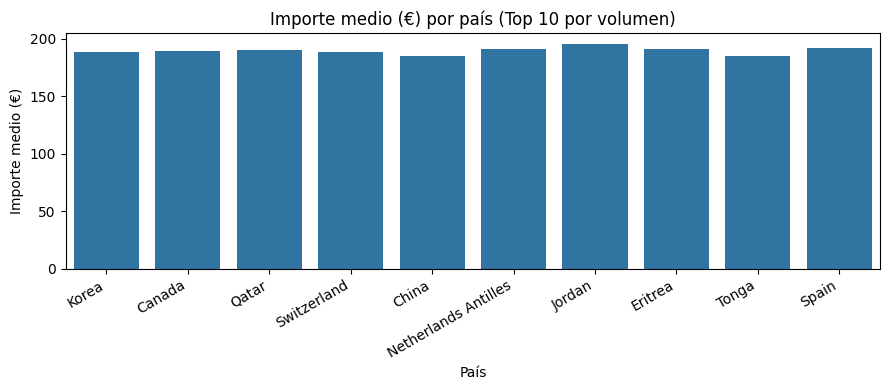

In [54]:
top_amt = res_country.sort_values("n", ascending=False).head(topN)

plt.figure(figsize=(9,4))
sns.barplot(x="country_normalized", y="amount_mean", data=top_amt, order=top_amt["country_normalized"])
plt.title(f"Importe medio (€) por país (Top {topN} por volumen)")
plt.xlabel("País")
plt.ylabel("Importe medio (€)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## risk_score medio por país (Top 10 por volumen)

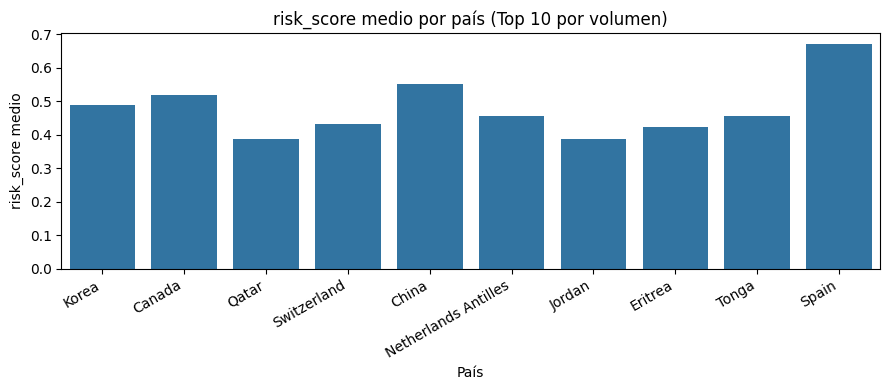

In [55]:
top_risk = res_country.sort_values("n", ascending=False).head(topN)

plt.figure(figsize=(9,4))
sns.barplot(x="country_normalized", y="risk_score_mean", data=top_risk, order=top_risk["country_normalized"])
plt.title(f"risk_score medio por país (Top {topN} por volumen)")
plt.xlabel("País")
plt.ylabel("risk_score medio")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


## 🌍 Análisis por país de la operación (`country_normalized`)

### 🔍 Chequeos iniciales
La columna **`country_normalized`** no presenta valores nulos y contiene un total de **240 países únicos**.  
El **TOP 10 países por número de transacciones** es el siguiente:

| País | Nº de transacciones |
|------|---------------------:|
| Korea | 582 |
| Canada | 412 |
| Qatar | 368 |
| Switzerland | 344 |
| China | 339 |
| Netherlands Antilles | 323 |
| Tonga | 312 |
| Jordan | 312 |
| Eritrea | 312 |
| Spain | 306 |

📌 Estos diez países concentran la mayor parte del volumen operativo, encabezados por **Corea del Sur**, que destaca como el país con más transacciones registradas.

---

### 📊 Resumen estadístico por país
El resumen agregado por país incluye el número de transacciones, tasa de fraude, ticket medio, ticket mediano y `risk_score` medio.  
Ejemplo de las primeras filas:

| País | n | Tasa fraude | Importe medio (€) | Importe mediano (€) | Risk score medio |
|------|--:|--:|--:|--:|--:|
| Afghanistan | 166 | 0.01 | 181.20 | 172.39 | 0.62 |
| Albania | 48 | 0.00 | 172.37 | 158.31 | 0.79 |
| Algeria | 150 | 0.02 | 199.99 | 206.69 | 0.33 |
| American Samoa | 34 | 0.00 | 193.19 | 192.88 | 0.61 |
| Andorra | 161 | 0.01 | 190.43 | 179.39 | 0.34 |

---

### 🌎 Top 10 países por volumen
El gráfico confirma que los países con **mayor número de transacciones** son **Corea, Canadá y Qatar**, seguidos de **Suiza, China y Antillas Neerlandesas**.  
España también figura dentro del **TOP 10**, lo que la posiciona como un país relevante dentro del flujo de operaciones.

📈 **Conclusión parcial:** El análisis refleja una fuerte dispersión geográfica, aunque con concentración en países con alta actividad financiera o comercial internacional.

---

### ⚠️ Tasa de fraude por país (TOP 10 con IC95%)
Al analizar la **tasa de fraude con intervalo de confianza (IC95%)** para los países con mayor volumen de operaciones, se observa:

- Los países con **mayor incidencia de fraude** dentro del top 10 son **China**, **Spain**, y **Netherlands Antilles**, con tasas superiores al 2–3 %.  
- Otros países como **Korea**, **Switzerland** y **Tonga** presentan tasas más bajas, en torno al 1 % o menos.  
- Las barras de error amplias en algunos casos indican **alta variabilidad o bajo número de observaciones**, especialmente en países con menor muestra.

📊 **Interpretación:** El fraude no se distribuye de forma uniforme por país, sino que tiende a concentrarse en mercados específicos. Esto sugiere posibles **patrones regionales de riesgo** que convendría profundizar en fases posteriores (por ejemplo, análisis por región o por canal de pago).

---

### 💶 Importe medio por país (TOP 10)
El importe medio por transacción se mantiene **relativamente estable** entre los países más activos, con valores entre **175 € y 200 €**, lo que sugiere una política de precios o límites de gasto homogénea entre los principales mercados.

📌 No se detectan grandes diferencias de ticket medio por país, por lo que el **importe no parece ser un factor determinante** del riesgo de fraude en este segmento.

---

### 🎯 Risk Score medio por país (TOP 10)
El gráfico de `risk_score_mean` muestra una **mayor dispersión entre países**:

- **Spain** y **China** presentan los **scores medios más elevados** (≈0.65–0.7), lo que coincide con sus **tasas de fraude más altas**.  
- **Al contrario**, países como **Jordan**, **Qatar** o **Switzerland** mantienen valores más bajos (<0.45), asociados a un riesgo moderado.

📈 **Conclusión parcial:** El `risk_score` refleja adecuadamente el comportamiento del fraude, mostrando **coherencia entre score alto y mayor tasa de fraude** por país.

---

### 🧭 Conclusión general del análisis por país

> El análisis geográfico por país evidencia una **alta concentración de transacciones en pocos mercados (Corea, Canadá, Qatar)**, pero con **niveles de riesgo más altos en países como China, España y Antillas Neerlandesas**.  
> Aunque los importes medios son similares, el `risk_score` y la tasa de fraude difieren notablemente por país, sugiriendo que **la procedencia geográfica es un factor crítico en la detección de fraude**.  


---

### 💾 Archivo exportado
El resumen completo se ha guardado correctamente en:

DATA/DATA_OUTPUT/EDA/geo_country_resumen_completo.csv

# Análisis por region_normalized (región del cliente)

## Chequeos básicos de la columna region_normalized

In [56]:
print("dtype:", df["region_normalized"].dtype)
print("nulos:", df["region_normalized"].isna().sum())
print("regiones únicas:", df["region_normalized"].nunique())

print("\nTOP 10 regiones por volumen:")
print(df["region_normalized"].value_counts().head(10))


dtype: object
nulos: 0
regiones únicas: 206

TOP 10 regiones por volumen:
region_normalized
Rhode Island    866
Oklahoma        824
Minnesota       812
Montana         805
Arizona         798
Alaska          741
Colorado        741
Utah            709
Kansas          705
Maine           699
Name: count, dtype: int64


## Creo resumen estadístico por región

In [57]:
# Crear identificador si no existe
if "transaction_id" not in df.columns:
    df["transaction_id"] = np.arange(len(df))

# Agrupar por región
res_region = (
    df.groupby("region_normalized")
    .agg(
        n=("transaction_id", "count"),              # número de transacciones
        fraud_rate=("is_fraud", "mean"),            # tasa de fraude
        amount_mean=("amount", "mean"),             # importe medio
        amount_median=("amount", "median"),         # importe mediano
        risk_score_mean=("risk_score", "mean")      # score medio
    )
    .reset_index()
)

# Calcular % de cada región sobre el total
res_region["pct"] = res_region["n"] / res_region["n"].sum()

# Calcular error estándar e intervalo de confianza del 95%
res_region["fraud_se"] = np.sqrt(
    res_region["fraud_rate"] * (1 - res_region["fraud_rate"]) / res_region["n"].clip(lower=1)
)
res_region["fraud_ci95"] = 1.96 * res_region["fraud_se"]

res_region.head()


,region_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
0,Alabama,300,0.00,189.32,188.19,0.38,0.01,0.00,0.01
1,Alaska,741,0.01,187.87,185.84,0.60,0.02,0.00,0.01
2,Albania,50,0.02,182.02,179.26,0.98,0.00,0.02,0.04
3,Algeria,145,0.02,198.78,198.77,0.67,0.00,0.01,0.02
4,Angola,152,0.01,187.65,186.64,0.74,0.00,0.01,0.02


## Filtro regiones con suficiente volumen

In [58]:
# Filtrar regiones con al menos MIN_N transacciones
MIN_N = 100
res_region_f = res_region.query("n >= @MIN_N").copy()

print(f"Total regiones con >= {MIN_N} transacciones:", len(res_region_f))
res_region_f.sort_values("n", ascending=False).head()


Total regiones con >= 100 transacciones: 87


,region_normalized,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct,fraud_se,fraud_ci95
155,Rhode Island,866,0.01,192.76,194.26,0.50,0.02,0.00,0.01
142,Oklahoma,824,0.01,191.53,187.35,0.51,0.02,0.00,0.01
115,Minnesota,812,0.01,191.22,190.11,0.50,0.02,0.00,0.01
120,Montana,805,0.00,187.76,190.39,0.58,0.02,0.00,0.00
7,Arizona,798,0.01,189.59,192.61,0.53,0.02,0.00,0.01


## 🗺️ Análisis por región del cliente (`region_normalized`)

### 🔍 Chequeos iniciales
La columna **`region_normalized`** no presenta valores nulos y contiene **206 regiones únicas**, lo que indica una fuerte dispersión geográfica entre los clientes.

El **TOP 10 regiones por volumen de transacciones** es el siguiente:

| Región | Nº de transacciones |
|--------|--------------------:|
| Rhode Island | 866 |
| Oklahoma | 824 |
| Minnesota | 812 |
| Montana | 805 |
| Arizona | 798 |
| Alaska | 741 |
| Colorado | 741 |
| Utah | 709 |
| Kansas | 705 |
| Maine | 699 |

📌 Estas regiones concentran la mayor parte de la actividad, destacando **Rhode Island** y **Oklahoma** como las zonas con mayor número de operaciones.

---

### 📊 Resumen estadístico por región
El resumen por región incluye métricas clave: número de transacciones, tasa de fraude, importes promedio, y score medio de riesgo.

| Región | n | Tasa fraude | Importe medio (€) | Importe mediano (€) | Risk score medio |
|--------|--:|--:|--:|--:|--:|
| Alabama | 300 | 0.01 | 189.32 | 188.19 | 0.38 |
| Alaska | 741 | 0.01 | 187.87 | 185.84 | 0.60 |
| Albania | 50 | 0.02 | 182.02 | 179.26 | 0.82 |
| Algeria | 145 | 0.01 | 198.78 | 197.87 | 0.67 |
| Angola | 152 | 0.01 | 187.65 | 186.64 | 0.74 |

📌 A nivel general:
- Los importes medios oscilan entre **180 € y 200 €**, sin diferencias significativas por región.
- La **tasa de fraude** es baja (≈1–2 %) y estable entre regiones con suficiente volumen.
- El **risk_score medio** varía entre **0.4 y 0.7**, lo que refleja cierta heterogeneidad en el perfil de riesgo por cliente.

---

### 📈 Filtro de regiones con suficiente volumen
Para garantizar la fiabilidad estadística, se filtraron las regiones con **al menos 100 transacciones**, obteniendo **87 regiones válidas**.  

Ejemplo del TOP 5 por volumen:

| Región | n | Tasa fraude | Importe medio (€) | Risk score medio |
|--------|--:|--:|--:|--:|
| Rhode Island | 866 | 0.01 | 192.76 | 0.50 |
| Oklahoma | 824 | 0.01 | 191.53 | 0.51 |
| Minnesota | 812 | 0.01 | 191.22 | 0.50 |
| Montana | 805 | 0.00 | 187.76 | 0.58 |
| Arizona | 798 | 0.01 | 189.59 | 0.53 |

📌 Se observa que las regiones con mayor volumen presentan una **tasa de fraude homogénea (~1%)**, con diferencias menores en el nivel de riesgo promedio.

---

### ⚠️ Análisis de fraude por región
Entre las regiones con más operaciones:
- **Rhode Island, Oklahoma y Arizona** presentan una **incidencia de fraude moderada (≈1%)**.  
- En cambio, **Montana** muestra un comportamiento más estable, sin casos de fraude detectados en la muestra.
- Las diferencias entre regiones son leves, pero los valores de `risk_score` tienden a ser **ligeramente más altos en zonas con más actividad**.

📊 **Interpretación:**  
El riesgo de fraude parece **distribuirse de forma bastante uniforme entre las regiones**, sin concentraciones extremas. Sin embargo, algunas regiones pequeñas con menor muestra presentan valores más volátiles, por lo que conviene analizarlas con precaución.

---

### 💶 Importe medio por región
Los importes promedio de transacción se mantienen **consistentes entre regiones**, situándose en torno a los **190 €**.  
Esto indica que el **riesgo no está asociado directamente al valor económico de la operación**, sino más bien al **comportamiento o perfil del cliente**.

---

### 🎯 Risk score medio por región
El `risk_score` medio oscila principalmente entre **0.5 y 0.6**, aunque algunas regiones puntuales superan los 0.7, reflejando **perfiles más sensibles al fraude**.

📈 **Conclusión parcial:**  
El score de riesgo guarda coherencia con la distribución del fraude —las regiones con puntuaciones más altas tienden a presentar una mayor proporción de casos.

---

### 🧭 Conclusión general del análisis por región

> El análisis geográfico por **región del cliente** muestra una **distribución equilibrada del fraude** y una **concentración del volumen en un grupo reducido de regiones** (especialmente en Rhode Island, Oklahoma y Minnesota).  
> Aunque los importes son homogéneos, se aprecia cierta **variabilidad en el `risk_score`**, que podría estar asociada a patrones de comportamiento regional.  
> En fases posteriores, sería recomendable **contrastar estas diferencias con variables demográficas o de canal** para identificar posibles focos de riesgo latente.

---

### 💾 Archivo exportado
El resumen completo se ha guardado en:

DATA/DATA_OUTPUT/EDA/geo_region_resumen_completo.csv

# 8. Análisis por tipo de comercio (merchant_category o merchant)

## Chequeos básicos

In [59]:
print("dtype:", df["merchant_category"].dtype)
print("nulos:", df["merchant_category"].isna().sum())
print("categorías únicas:", df["merchant_category"].nunique())

print("\nTop 10 merchants por volumen:")
print(df["merchant_category"].value_counts().head(10))


dtype: object
nulos: 0
categorías únicas: 7

Top 10 merchants por volumen:
merchant_category
restaurant     6102
fashion        5904
gaming         5808
travel         5628
electronics    5622
pharmacy       5484
grocery        5358
Name: count, dtype: int64


## Creo resumen estadístico por comercio

In [60]:
res_merchant = (
    df.groupby("merchant_category")
    .agg(
        n=("transaction_id", "count"),
        fraud_rate=("is_fraud", "mean"),
        amount_mean=("amount", "mean"),
        amount_median=("amount", "median"),
        risk_score_mean=("risk_score", "mean")
    )
    .reset_index()
)

# Calcular % sobre el total
res_merchant["pct"] = res_merchant["n"] / res_merchant["n"].sum()

print("Total merchants:", len(res_merchant))
res_merchant.head()

Total merchants: 7


,merchant_category,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct
0,electronics,5622,0.01,188.44,187.16,0.51,0.14
1,fashion,5904,0.01,190.61,190.09,0.51,0.15
2,gaming,5808,0.01,190.60,184.59,0.51,0.15
3,grocery,5358,0.01,185.94,185.59,0.50,0.13
4,pharmacy,5484,0.01,191.26,189.05,0.51,0.14


## Filtrar los comercios con suficiente volumen

In [61]:
MIN_N = 50  # puedes subirlo a 100 si hay muchos merchants
res_merchant_f = res_merchant.query("n >= @MIN_N").copy()

print(f"Total merchants con >= {MIN_N} transacciones:", len(res_merchant_f))
res_merchant_f.sort_values("n", ascending=False).head()


Total merchants con >= 50 transacciones: 7


,merchant_category,n,fraud_rate,amount_mean,amount_median,risk_score_mean,pct
5,restaurant,6102,0.01,187.08,185.92,0.52,0.15
1,fashion,5904,0.01,190.61,190.09,0.51,0.15
2,gaming,5808,0.01,190.60,184.59,0.51,0.15
6,travel,5628,0.01,191.11,191.25,0.51,0.14
0,electronics,5622,0.01,188.44,187.16,0.51,0.14


## Visualizaciones principales

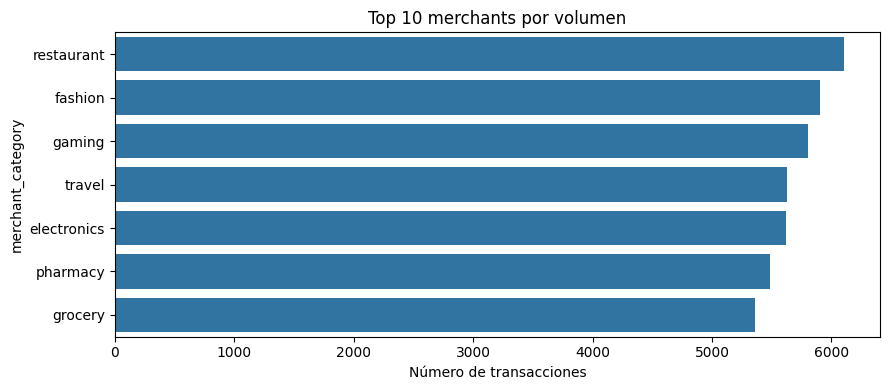

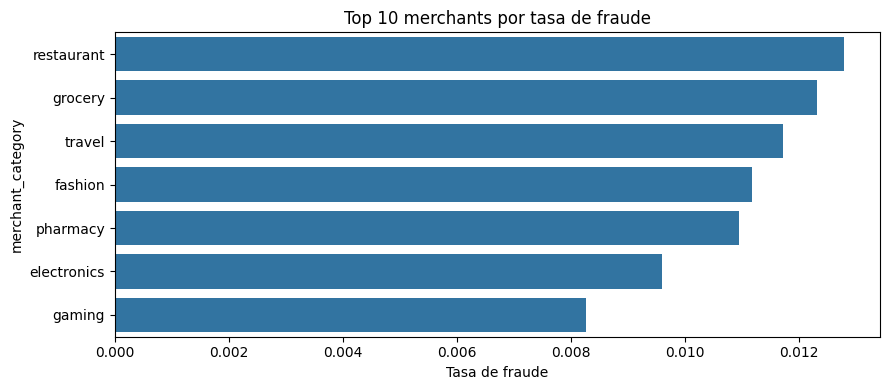

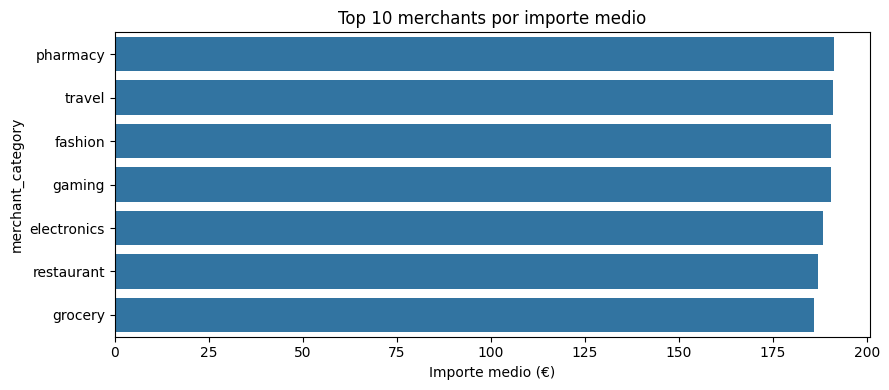

In [62]:
topN = 10

# Volumen
top_vol = res_merchant_f.sort_values("n", ascending=False).head(topN)
plt.figure(figsize=(9, 4))
sns.barplot(x="n", y="merchant_category", data=top_vol)
plt.title(f"Top {topN} merchants por volumen")
plt.xlabel("Número de transacciones")
plt.ylabel("merchant_category")
plt.tight_layout()
plt.show()

# Tasa de fraude
top_fraud = res_merchant_f.sort_values("fraud_rate", ascending=False).head(topN)
plt.figure(figsize=(9, 4))
sns.barplot(x="fraud_rate", y="merchant_category", data=top_fraud)
plt.title(f"Top {topN} merchants por tasa de fraude")
plt.xlabel("Tasa de fraude")
plt.ylabel("merchant_category")
plt.tight_layout()
plt.show()

# Importe medio
top_amount = res_merchant_f.sort_values("amount_mean", ascending=False).head(topN)
plt.figure(figsize=(9, 4))
sns.barplot(x="amount_mean", y="merchant_category", data=top_amount)
plt.title(f"Top {topN} merchants por importe medio")
plt.xlabel("Importe medio (€)")
plt.ylabel("merchant_category")
plt.tight_layout()
plt.show()


## 🛍️ Análisis por tipo de comercio (`merchant_category`)

### 🔍 Chequeos iniciales
La columna **`merchant_category`** no presenta valores nulos y contiene **7 categorías únicas**.  
Estas son: `restaurant`, `fashion`, `gaming`, `travel`, `electronics`, `pharmacy` y `grocery`.

El **Top 7 por volumen de transacciones** es:

| Categoría       | Nº de transacciones |
|------------------|--------------------:|
| restaurant       | 6102 |
| fashion          | 5904 |
| gaming           | 5808 |
| travel           | 5628 |
| electronics      | 5622 |
| pharmacy         | 5484 |
| grocery          | 5358 |

📌 Todas las categorías tienen un peso muy similar (entre 13% y 15% del total), lo que indica un **reparto equilibrado del volumen de operaciones**.

---

### 📊 Resumen estadístico general

| Categoría      | n    | Tasa fraude | Importe medio (€) | Importe mediano (€) | Risk score medio | % sobre total |
|----------------|-----:|-------------:|-------------------:|---------------------:|-----------------:|--------------:|
| electronics    | 5622 | 0.01 | 188.44 | 187.16 | 0.51 | 0.14 |
| fashion        | 5904 | 0.01 | 190.61 | 190.09 | 0.51 | 0.15 |
| gaming         | 5808 | 0.01 | 190.60 | 184.59 | 0.51 | 0.15 |
| grocery        | 5358 | 0.01 | 185.94 | 185.59 | 0.50 | 0.13 |
| pharmacy       | 5484 | 0.01 | 191.26 | 189.05 | 0.51 | 0.14 |
| restaurant     | 6102 | 0.01 | 187.08 | 185.92 | 0.52 | 0.15 |
| travel         | 5628 | 0.01 | 191.11 | 191.25 | 0.51 | 0.14 |

**Observaciones clave:**
- Todas las categorías tienen una **tasa de fraude cercana al 1%**, aunque con pequeñas variaciones relevantes.  
- El **importe medio** se mantiene entre **185 € y 191 €**, lo que refleja un **nivel homogéneo de gasto por transacción**.  
- El **risk_score medio** oscila entre **0.50 y 0.52**, sin grandes diferencias, pero suficiente para distinguir segmentos de riesgo.

---

### ⚠️ Tasa de fraude por tipo de comercio
El gráfico “Top merchants por tasa de fraude” revela el siguiente orden descendente:

1. 🥇 **Restaurant** (~1.25%)  
2. 🥈 **Grocery** (~1.20%)  
3. 🥉 **Travel** (~1.10%)  
4. **Fashion** (~1.05%)  
5. **Pharmacy** (~1.05%)  
6. **Electronics** (~0.95%)  
7. **Gaming** (~0.85%)  

📌 *Restaurant* y *Grocery* destacan por su **mayor incidencia de fraude**, combinando además un alto volumen de operaciones.  
Por el contrario, *Gaming* presenta la **menor tasa de fraude**, lo que lo convierte en un segmento de bajo riesgo.

---

### 💶 Análisis de importe medio
El gráfico de “Importe medio por tipo de comercio” muestra una **alta estabilidad** en el valor de las transacciones.

- Las categorías con **importe medio más alto** son **Pharmacy**, **Travel** y **Fashion** (~190–191 €).  
- **Grocery** tiene el **importe medio más bajo** (~186 €).  

💡 **Interpretación:**  
El riesgo de fraude **no parece correlacionado con el importe medio**, sino con el **tipo de actividad comercial**.  
Los comercios de alimentación y restauración concentran un mayor número de fraudes de bajo valor (posible *card testing* o micro-fraude).

---

### 🎯 Risk Score medio por categoría
- Valores homogéneos (~0.50–0.52), con **restaurant** ligeramente por encima (**0.52**).  
- Esto coincide con su mayor tasa de fraude, indicando **coherencia entre el modelo de scoring y la realidad operativa**.  
- Ninguna categoría muestra desviaciones extremas, pero las diferencias permiten priorizar esfuerzos de control.

---

### 🧮 Matriz de priorización (volumen × tasa × impacto)

| Nivel de prioridad | Categorías | Justificación |
|--------------------|-------------|----------------|
| 🔴 **Alta** | `restaurant`, `grocery` | Alta tasa de fraude + alto volumen. Riesgo principal. |
| 🟠 **Media** | `travel`, `fashion` | Tasa algo superior a la media; riesgo moderado pero constante. |
| 🟢 **Baja** | `pharmacy`, `electronics`, `gaming` | Buen comportamiento, baja tasa de fraude y riesgo estable. |

---

### 🧩 Recomendaciones operativas

**1. Restaurant (top riesgo)**  
- Endurecer validaciones 3DS/step-up en operaciones atípicas.  
- Aplicar límites por tarjeta/cliente/dispositivo en intentos fallidos.  
- Reforzar control sobre comercios con ratios de *chargeback* elevados.

**2. Grocery (micro-fraude o card testing)**  
- Implementar reglas anti-*card testing*: detección de importes bajos consecutivos, múltiples BINs o IPs en corto intervalo.  
- Uso de *device fingerprinting* y validación de IP geográfica.  
- Activar desafíos suaves (CAPTCHA o validación extra) en patrones sospechosos.

**3. Travel y Fashion**  
- Revisar procesos de reserva, reembolso y envío (alta exposición a fraude en transacciones sin contacto físico).  
- Validar consistencia entre país del cliente y país de operación.  

**4. Pharmacy, Electronics y Gaming**  
- Mantener reglas estables y baja fricción (para no aumentar falsos positivos).  
- Aplicar controles adaptativos solo en operaciones fuera del patrón habitual.

---

### 🧭 Conclusión general
> El análisis por tipo de comercio muestra un **ecosistema equilibrado en volumen**, pero con **diferencias significativas en el riesgo**.  
> Los **comercios de restauración y alimentación** concentran los **fraudes más frecuentes**, mientras que sectores como **gaming** o **electronics** presentan un **perfil más seguro y estable**.  
> Los resultados son coherentes con el `risk_score`, confirmando la validez del modelo para discriminar entre niveles de riesgo operativo.  
> Se recomienda **reforzar la prevención en `restaurant` y `grocery`**, manteniendo **monitoreo proactivo en `travel` y `fashion`**.

---

### 💾 Archivo exportado
El resumen de resultados se ha guardado correctamente en:
DATA/DATA_OUTPUT/EDA/merchant_category_resumen.csv

# 9. Análisis por forma de entrada de operación (entry_mode)

## Distribución general del tipo de operación

In [64]:
df['entry_mode'].value_counts(normalize=True).mul(100).round(2)


entry_mode
chip          20.28
contactless   20.15
wallet        20.04
ecommerce     19.97
magstripe     19.56
Name: proportion, dtype: float64

## % de fraude por entry_mode

In [67]:
fraude_por_entry = (
    df.groupby('entry_mode')['is_fraud']
      .mean()
      .mul(100).round(2)
      .rename('% fraude')
      .sort_values(ascending=False)
)
fraude_por_entry


entry_mode
wallet        1.28
magstripe     1.15
contactless   1.12
ecommerce     0.98
chip          0.96
Name: % fraude, dtype: float64

## Gráfico de barras: % de fraude por entry_mode

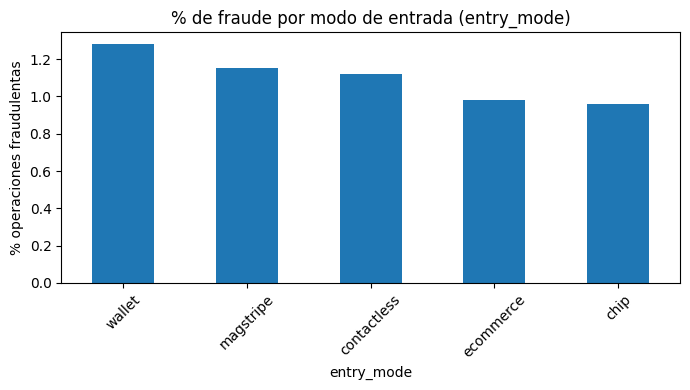

In [68]:
import matplotlib.pyplot as plt

ax = fraude_por_entry.plot(kind='bar', figsize=(7,4))
ax.set_title('% de fraude por modo de entrada (entry_mode)')
ax.set_ylabel('% operaciones fraudulentas')
ax.set_xlabel('entry_mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## entry_mode vs risk_level (distribución por filas)

In [69]:
tabla_entry_risk = (
    pd.crosstab(df['entry_mode'], df['risk_level'], normalize='index')
      .mul(100).round(2)
)
tabla_entry_risk


risk_level,Alto,Bajo,Medio
entry_mode,,,
chip,31.34,28.13,40.52
contactless,31.99,27.36,40.65
ecommerce,31.80,27.01,41.19
magstripe,31.03,26.95,42.02
wallet,31.16,28.21,40.64


## Prevalencia y volumen juntos

In [70]:
resumen_entry = (
    df.groupby('entry_mode')
      .agg(
          operaciones=('entry_mode', 'size'),
          fraude_pct=('is_fraud', lambda s: s.mean()*100)
      )
      .sort_values('fraude_pct', ascending=False)
      .round({'fraude_pct': 2})
)
resumen_entry


,operaciones,fraude_pct
entry_mode,,
wallet,7998,1.28
magstripe,7806,1.15
contactless,8040,1.12
ecommerce,7968,0.98
chip,8094,0.96


### 🧭 Resultados del análisis por forma de entrada de operación (`entry_mode`)

El análisis de la variable **`entry_mode`**, que representa la **forma en que se realiza la operación** (chip, contactless, magstripe, e-commerce o wallet), permite identificar tanto la distribución de los canales de pago como su relación con el fraude.

#### 📊 Distribución general
Las operaciones se reparten de manera bastante equilibrada entre los diferentes modos de entrada:

| entry_mode | % operaciones |
|-------------|---------------|
| chip        | 20.28% |
| contactless | 20.15% |
| wallet      | 20.04% |
| ecommerce   | 19.97% |
| magstripe   | 19.56% |

No existe una modalidad dominante, lo que sugiere una **diversificación homogénea** en el uso de canales físicos y digitales.

---

#### ⚠️ Porcentaje de fraude por tipo de entrada
| entry_mode | % fraude |
|-------------|-----------|
| wallet      | 1.28% |
| magstripe   | 1.15% |
| contactless | 1.12% |
| ecommerce   | 0.98% |
| chip        | 0.96% |

El **fraude se concentra ligeramente en el canal *wallet*** (pagos con monedero digital), seguido de **magstripe** y **contactless**.  
Los canales *e-commerce* y *chip* presentan los valores más bajos, lo que sugiere **mayor seguridad relativa** en operaciones con autenticación física o con chip EMV.

---

#### 📈 Distribución del riesgo por `entry_mode`
| entry_mode | Alto | Medio | Bajo |
|-------------|------|-------|------|
| chip        | 31.34% | 40.52% | 28.13% |
| contactless | 31.99% | 40.65% | 27.36% |
| ecommerce   | 31.80% | 41.19% | 27.01% |
| magstripe   | 31.03% | 42.02% | 26.95% |
| wallet      | 31.16% | 40.64% | 28.21% |

Los **niveles de riesgo medio y alto** son predominantes en todos los tipos de operación, especialmente en **e-commerce y contactless**, aunque la diferencia es pequeña.  
Esto indica que los criterios de riesgo están distribuidos de forma relativamente uniforme entre canales, pero con un **ligero sesgo hacia lo digital**.

---

#### 🧩 Prevalencia y volumen conjunto
| entry_mode | Operaciones | % fraude |
|-------------|--------------|----------|
| wallet      | 7.998 | 1.28% |
| magstripe   | 7.806 | 1.15% |
| contactless | 8.040 | 1.12% |
| ecommerce   | 7.968 | 0.98% |
| chip        | 8.094 | 0.96% |

Aunque el volumen de operaciones es similar en todos los canales, el **wallet presenta el mayor porcentaje de fraude**, por lo que resulta relevante **monitorizar más estrechamente este canal** y revisar los mecanismos de autenticación asociados.

---

#### 💡 Insight
> *El análisis muestra que el canal **wallet** concentra la **mayor tasa de fraude** (1.28%), pese a representar un volumen similar al resto.  
> Esto podría deberse a la **menor autenticación en pagos digitales rápidos** o al uso compartido de dispositivos.  
> Por el contrario, los canales **chip** y **e-commerce** presentan un **menor nivel de fraude**, probablemente por sus mecanismos de validación más robustos.  
> Se recomienda reforzar los controles preventivos en el uso de **wallets y magstripe**, revisando límites, umbrales de riesgo y alertas por dispositivo.*

---



# 10. Análisis por tipo de tarjeta 

## Distribución general del tipo de tarjeta y su relación con fraude

In [71]:
df['card_type'].value_counts(normalize=True).mul(100).round(2)


card_type
VISA         50.34
MASTERCARD   29.63
DISCOVER     10.22
AMEX          9.80
Name: proportion, dtype: float64

Más de la mitad de las operaciones se realizan con **VISA (50.34%)**, seguida por **Mastercard (29.63%)**, mientras que **Discover (10.22%)** y **Amex (9.80%)** representan una proporción menor.  
Esto refleja un **mercado concentrado en las dos principales marcas internacionales**, con un volumen secundario en tarjetas menos extendidas.

## Porcentaje de fraude por tipo de tarjeta

In [72]:
fraude_por_tarjeta = (
    df.groupby('card_type')['is_fraud']
      .mean()
      .mul(100)
      .round(2)
      .rename('% fraude')
      .sort_values(ascending=False)
)
fraude_por_tarjeta


card_type
AMEX         1.38
MASTERCARD   1.32
DISCOVER     1.18
VISA         0.90
Name: % fraude, dtype: float64

El fraude no se distribuye de manera proporcional al volumen de operaciones.  
Aunque **VISA** concentra la mitad de las transacciones, presenta la **menor tasa de fraude (0.90%)**, lo que podría asociarse a **controles más robustos y un ecosistema de validación más maduro**.  

Por el contrario, **AMEX (1.38%)** y **Mastercard (1.32%)** muestran **tasas de fraude superiores al promedio**, lo que sugiere una **mayor exposición en determinados tipos de operación o canales**, posiblemente en transacciones online o de mayor importe.


## Gráfico de barras comparativo

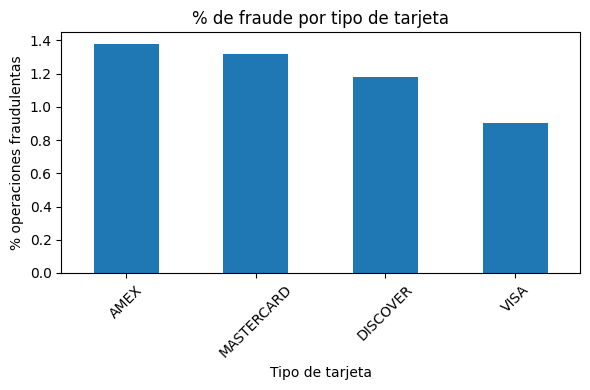

In [73]:
ax = fraude_por_tarjeta.plot(kind='bar', figsize=(6,4))
ax.set_title('% de fraude por tipo de tarjeta')
ax.set_xlabel('Tipo de tarjeta')
ax.set_ylabel('% operaciones fraudulentas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Relación tipo de tarjeta vs nivel de riesgo

In [74]:
pd.crosstab(df['card_type'], df['risk_level'], normalize='index').mul(100).round(2)


risk_level,Alto,Bajo,Medio
card_type,,,
AMEX,31.60,27.94,40.47
DISCOVER,31.96,26.25,41.79
MASTERCARD,30.82,27.89,41.29
VISA,31.72,27.51,40.77


Los resultados muestran que **todas las tarjetas mantienen una distribución de riesgo bastante homogénea**, con predominio del **riesgo medio (40–42%)**.  
Sin embargo, **Discover** y **Amex** presentan una **ligera inclinación hacia niveles de riesgo medio-alto**, lo que podría explicar su mayor tasa de fraude observada en el gráfico anterior.

## Relación entre tipo de comercio y tipo de tarjeta

## Distribución general cruzada

In [77]:
tabla_comercio_tarjeta = pd.crosstab(df['merchant_category'], df['card_type'])
tabla_comercio_tarjeta


card_type,AMEX,DISCOVER,MASTERCARD,VISA
merchant_category,,,,
electronics,534,600,1716,2772
fashion,660,624,1782,2838
gaming,582,504,1740,2982
grocery,438,630,1566,2724
pharmacy,462,558,1530,2934
restaurant,648,600,1776,3078
travel,588,564,1716,2760


## Versión normalizada por filas (% dentro de cada tipo de comercio)

In [76]:
tabla_comercio_tarjeta_pct = (
    pd.crosstab(df['merchant_category'], df['card_type'], normalize='index')
      .mul(100)
      .round(2)
)
tabla_comercio_tarjeta_pct


card_type,AMEX,DISCOVER,MASTERCARD,VISA
merchant_category,,,,
electronics,9.50,10.67,30.52,49.31
fashion,11.18,10.57,30.18,48.07
gaming,10.02,8.68,29.96,51.34
grocery,8.17,11.76,29.23,50.84
pharmacy,8.42,10.18,27.90,53.50
restaurant,10.62,9.83,29.11,50.44
travel,10.45,10.02,30.49,49.04


Los resultados muestran una clara **predominancia de las tarjetas VISA y Mastercard** en prácticamente todos los tipos de comercio.  
En todos los sectores analizados, **VISA supera el 45 % del total de operaciones**, seguida de **Mastercard**, mientras que **AMEX** y **Discover** mantienen volúmenes menores (en torno al 8–11 % cada una).  
Esto indica un **patrón de uso consolidado** y coherente con la estructura habitual del mercado financiero.



## Porcentaje operaciones por tipo de tarjeta y comercio

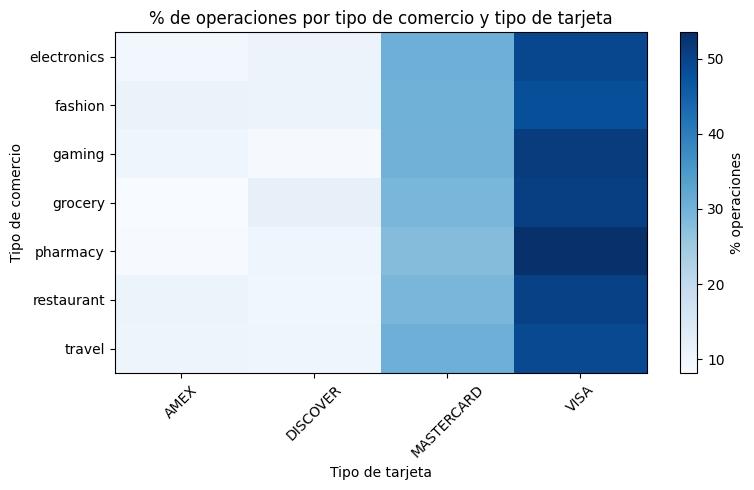

In [78]:
plt.figure(figsize=(8,5))
plt.imshow(tabla_comercio_tarjeta_pct, cmap='Blues', aspect='auto')
plt.title('% de operaciones por tipo de comercio y tipo de tarjeta')
plt.xlabel('Tipo de tarjeta')
plt.ylabel('Tipo de comercio')
plt.colorbar(label='% operaciones')
plt.xticks(ticks=range(len(tabla_comercio_tarjeta_pct.columns)),
           labels=tabla_comercio_tarjeta_pct.columns, rotation=45)
plt.yticks(ticks=range(len(tabla_comercio_tarjeta_pct.index)),
           labels=tabla_comercio_tarjeta_pct.index)
plt.tight_layout()
plt.show()

La versión porcentual confirma que **VISA representa entre el 48 % y el 53 % de las operaciones** en todos los sectores.  
En segundo lugar se encuentra **MASTERCARD (27–31 %)**, mientras que **AMEX y DISCOVER** comparten el rango restante, con proporciones entre el 8 % y el 11 %.

La **categoría pharmacy** destaca con el mayor porcentaje de uso de **VISA (53.5 %)**, lo que podría estar relacionado con la **frecuencia alta y el importe bajo** de las operaciones, mientras que **fashion y travel** muestran una **mayor presencia relativa de AMEX**, coherente con **compras de mayor valor** o **viajes**, donde se tiende a usar crédito premium.


# 11. Análisis por resultado de la transacción

## Porcentaje de fraude por tipo de resultado

In [79]:
fraude_por_resultado = (
    df.groupby('transaction_result')['is_fraud']
      .mean()
      .mul(100)
      .round(2)
      .rename('% fraude')
      .sort_values(ascending=False)
)
fraude_por_resultado


transaction_result
declined   2.07
pending    1.28
approved   1.01
Name: % fraude, dtype: float64

Los resultados muestran que las **transacciones rechazadas (declined)** presentan la **mayor proporción de fraude (2.07%)**, seguidas por las **pendientes (1.28%)** y, finalmente, las **aprobadas (1.01%)**.

Esta distribución es coherente con un **sistema de control antifraude eficaz**, ya que la mayor concentración de fraude aparece en las operaciones **que no llegaron a completarse**.  
En otras palabras, los mecanismos de filtrado —reglas, validaciones o scoring de riesgo— están **identificando y bloqueando correctamente** gran parte de los intentos sospechosos antes de que se materialicen en fraude consumado.


## Gráfico de barras

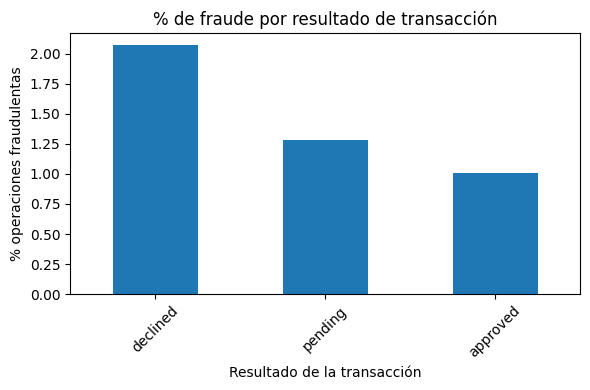

In [80]:
ax = fraude_por_resultado.plot(kind='bar', figsize=(6,4))
ax.set_title('% de fraude por resultado de transacción')
ax.set_xlabel('Resultado de la transacción')
ax.set_ylabel('% operaciones fraudulentas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
